<a href="https://colab.research.google.com/github/ibtissam01/Fetale_health-_-classifiaction-clusterng/blob/main/Livrable_Finale_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------------------------------------------------------------------
**-- Membres du groupe** :
>   * Soufiane Eghazi 13°
>   * Ibtissam Labyady 23°
>   * Amine Maasri  26°

**-- fillière** : *ICSD*
##
---

## Projet machine learning

---

# Projet:
    Analyse de données en apprentissage automatique pour résoudre des problèmes de classification et de clustering dans le domaine de la santé .
    -----------------------------------------------------------------------------------------------------------------------

## Introduction:
    Dans ce notebook, on a analyser des données dans le domaine de la santé et plus précisament classification de la santé fœtale en utilisant des techniques d'apprentissage automatique. on a explorer une variété de techniques de classification et de clustering pour résoudre des problèmes spécifiques dans ce domaine et les évaluer afin de conclure et présenter les résultats à interprter.
    -----------------------------------------------------------------------------------------------------------------------

## Dataset :

    le lien de dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?select=fetal_health.csv
   ###### Contexte:
    La réduction de la mortalité infantile se reflète dans plusieurs objectifs de développement durable des Nations Unies et est un indicateur clé du progrès humain.
    L'ONU s'attend à ce que d'ici 2030, les pays mettent fin aux décès évitables de nouveau-nés et d'enfants de moins de 5 ans, tous les pays visant à réduire la mortalité des moins de 5 ans à au moins 25 pour 1 000 naissances vivantes.

    Parallèlement à la notion de mortalité infantile, il y a bien sûr la mortalité maternelle, qui représente 295 000 décès pendant et après la grossesse et l'accouchement (en 2017). La grande majorité de ces décès (94 %) sont survenus dans des milieux à faibles ressources, et la plupart auraient pu être évités .

    À la lumière de ce qui a été mentionné ci-dessus, les cardiotocogrammes (CTG) sont une option simple et abordable pour évaluer la santé fœtale, permettant aux professionnels de la santé de prendre des mesures afin de prévenir la mortalité infantile et maternelle. L'équipement lui-même fonctionne en envoyant des impulsions ultrasonores et en lisant sa réponse, faisant ainsi la lumière sur la fréquence cardiaque fœtale (FHR), les mouvements fœtaux, les contractions utérines et plus encore.

   ###### Données:
    Ce jeu de données contient 2126 enregistrements de caractéristiques extraites d'examens de Cardiotocogramme, qui ont ensuite été classés par trois experts obstétriciens en 3 classes :

    @ Normal
    @ Suspect
    @ Pathologique
    -----------------------------------------------------------------------------------------------------------------------

## I.Analyse exploratoire des données :EDA
    Avant de commencer à construire des modèles, on doit effectuer une analyse exploratoire des données pour comprendre les données. on peut utiliser des bibliothèques Python telles que Pandas, Numpy, Seaborn et Matplotlib pour visualiser les données et effectuer des statistiques descriptives.
    -----------------------------------------------------------------------------------------------------------------------


#### 1.Importation des bibliothèques:
    Tout d'abord, on va importer les bibliothèques nécessaires pour l'analyse exploratoire des données et la construction de modèles.
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score

#### 2.Téléchargé le jeu de donnée:
    Ensuite, on va lire les données et afficher les cinq premières lignes pour comprendre la structure des données.
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
# Lecture des données
data = pd.read_csv("fetal_health.csv")

# Afficher les 5 premières lignes
data.head()


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

#### 3. Informations sur le jeu de données
     On va voir les informations sur les données, notamment le nombre de colonnes, le nombre d'observations et le type de données de chaque colonne.
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
# Informations et statistiques sur les données
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
#vérifier les valeurs manquantes.
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
# Statistiques descriptives
data.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

#### 4.Distribution des variables :
    Pour comprendre la distribution des valeurs dans chaque colonne, on va afficher l'histogramme de chaque colonne.
    -----------------------------------------------------------------------------------------------------------------------

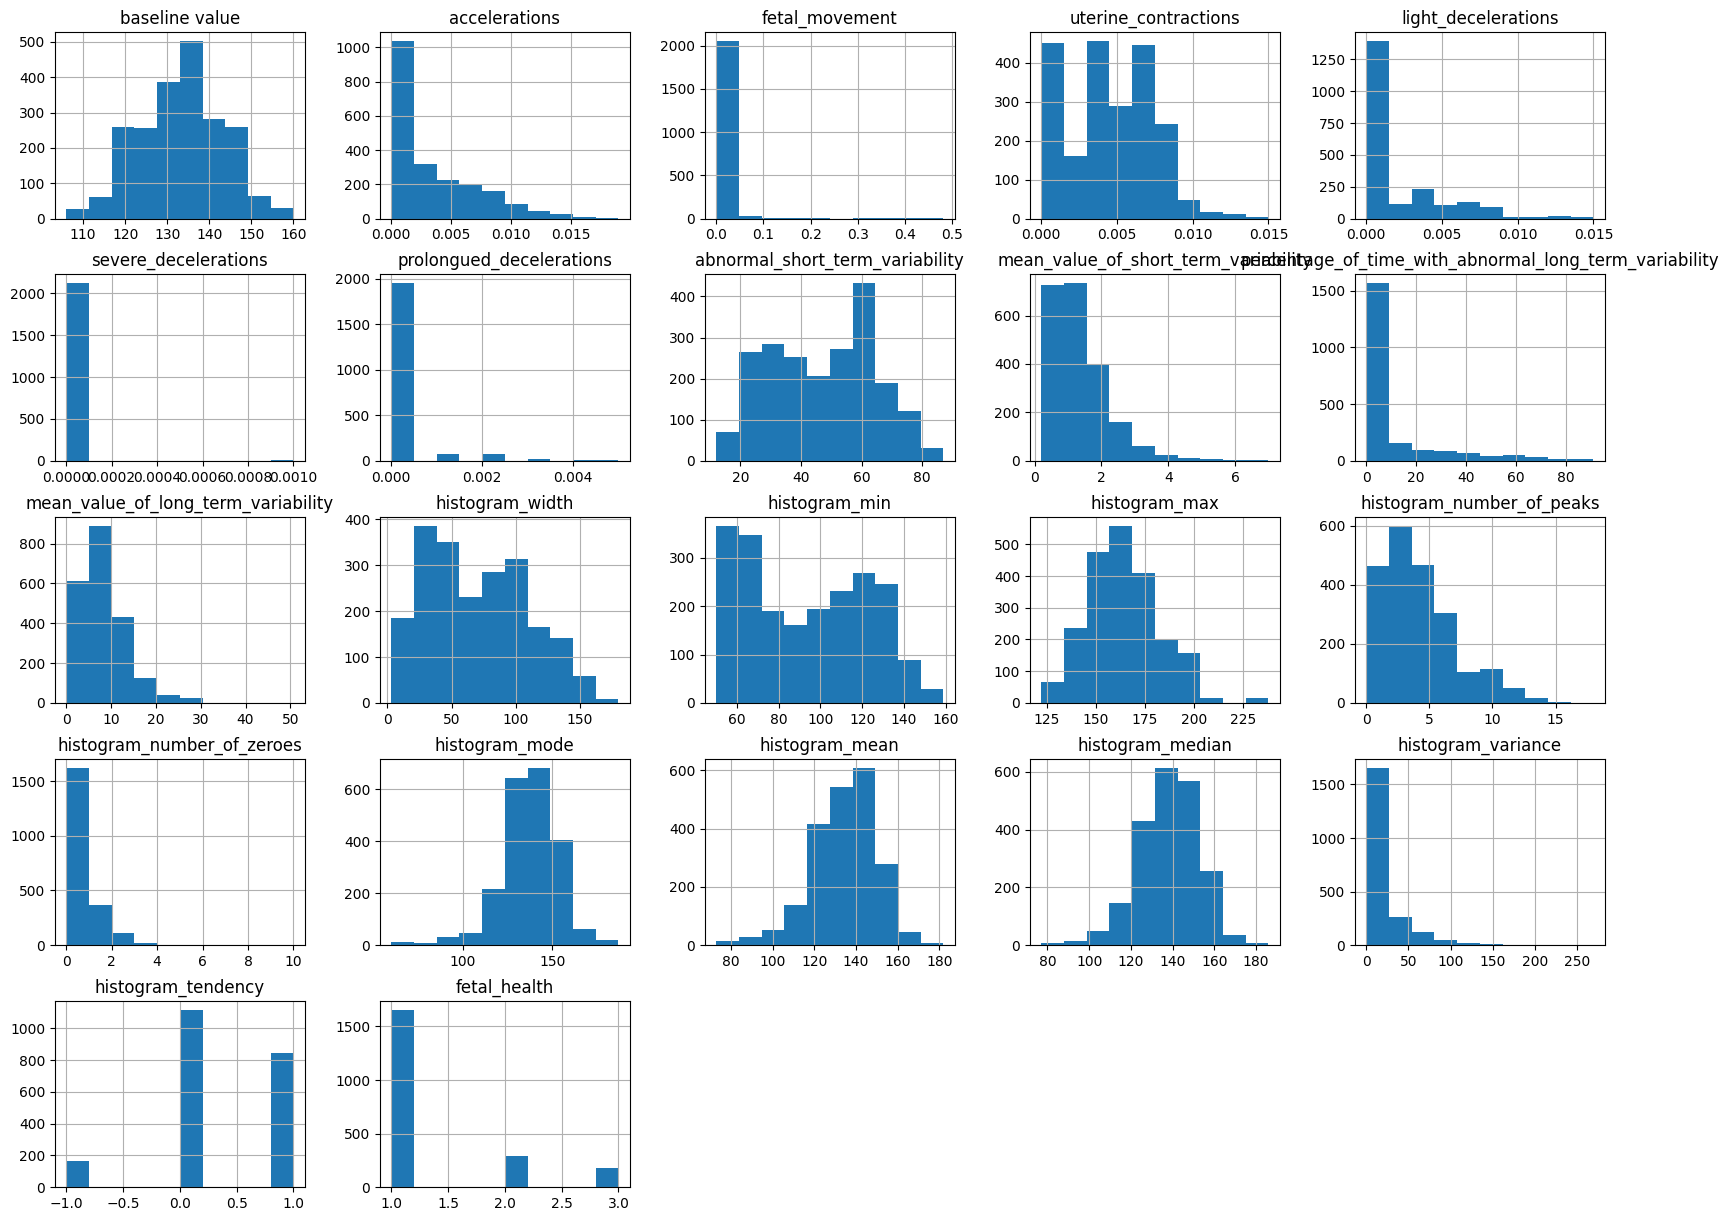

In [ ]:
# Histogramme des colonnes
data.hist(figsize=(20, 15))
plt.show()


#### 5.Fréquence des catégories:
    Maintenant on visualise les fréquences de chaque catégorie.

    -----------------------------------------------------------------------------------------------------------------------

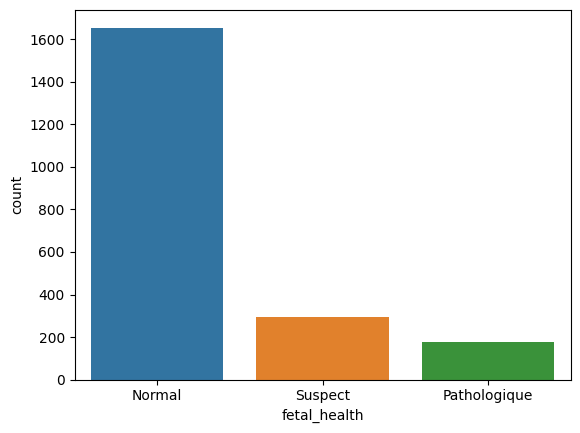

In [ ]:
ax=sns.countplot(x='fetal_health', data=data)
ax.set_xticklabels(['Normal', 'Suspect', 'Pathologique'])
plt.show()

#### 5. Features selection:
    On peut faire la selection des features par les corrélations et les tests d'hypothèses .
    -----------------------------------------------------------------------------------------------------------------------

###### 5.1- Corrélations de Pearson:
    On va  calculer la corrélation entre chaque paire de colonnes et afficher la matrice de corrélation sous forme de carte de chaleur

    -----------------------------------------------------------------------------------------------------------------------

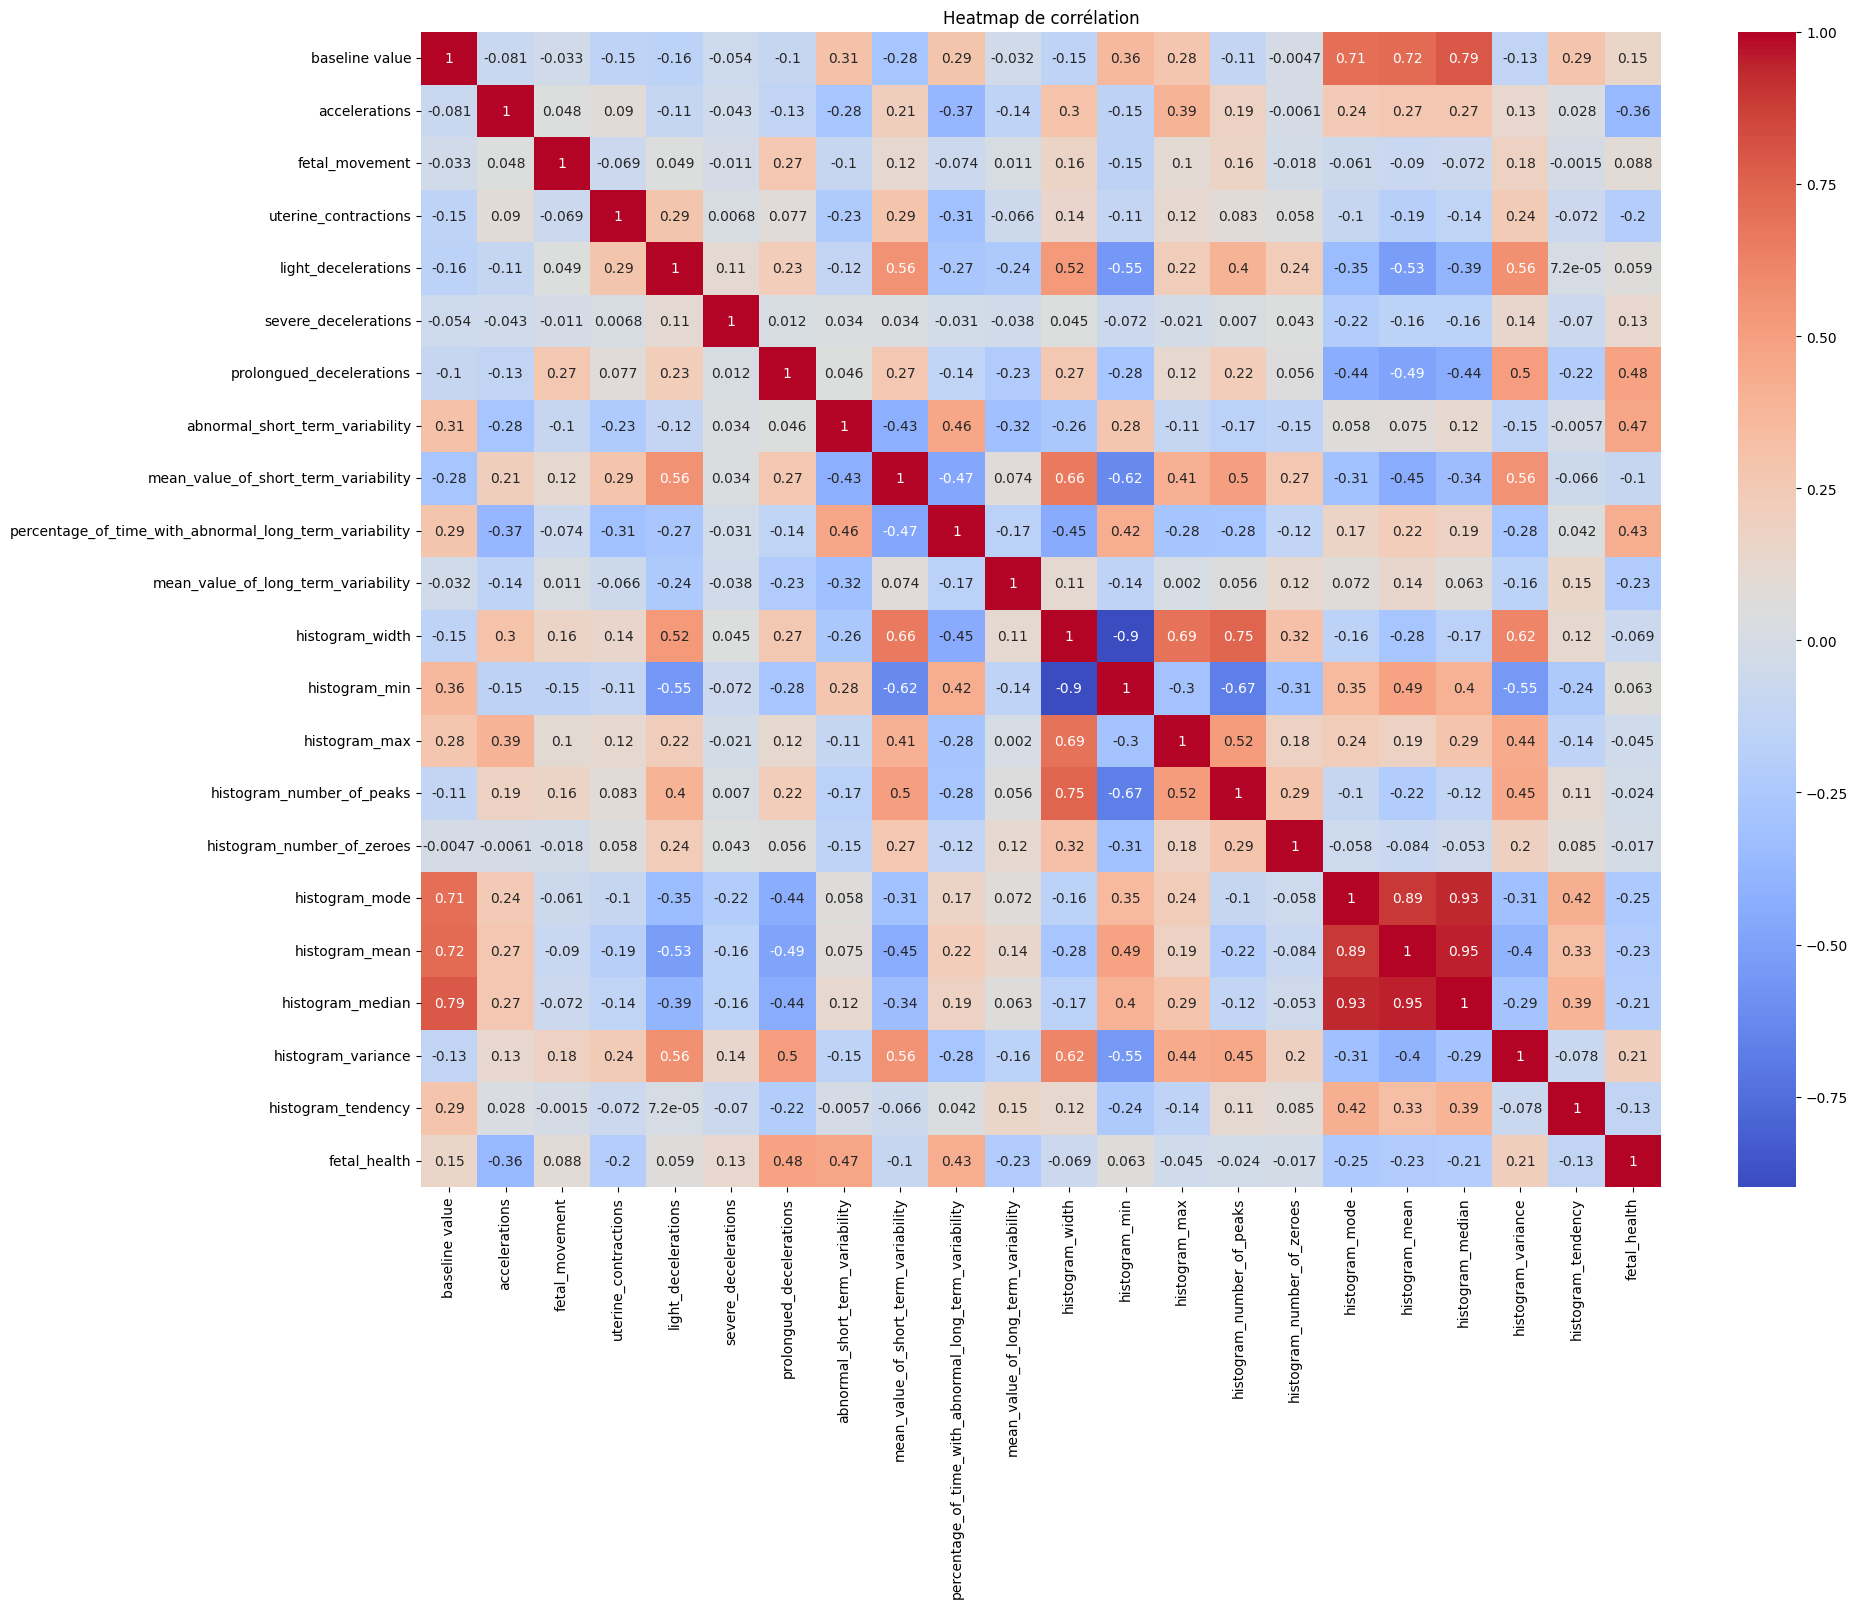

In [ ]:
# Matrice de corrélation
corr = data.corr()
# Afficher la carte de chaleur
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de corrélation")
plt.show()


###### 5.2- coefficient de Spearman
    Pour analyser la corrélation entre une variable qualitative catégorielle et plusieurs variables quantitatives , on va utiliser le corefficient de Spearman .
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
from scipy.stats import spearmanr
# Calculer la corrélation de Spearman pour chaque variable quantitative
for col in data.columns:
    if col != 'fetal_health':
        corr, pvalue = spearmanr(data[col], data['fetal_health'])
        print(col,"| : ","Spearman_Corr: ", corr,"|  P-value: ", pvalue)
        print("---------------------------------------------------------------------------------------------------------------")


baseline value | :  Spearman_Corr:  0.22130045411478824 |  P-value:  5.368098225933986e-25
---------------------------------------------------------------------------------------------------------------
accelerations | :  Spearman_Corr:  -0.4555291981182116 |  P-value:  2.0523795138430645e-109
---------------------------------------------------------------------------------------------------------------
fetal_movement | :  Spearman_Corr:  0.11425783802684436 |  P-value:  1.27450823163115e-07
---------------------------------------------------------------------------------------------------------------
uterine_contractions | :  Spearman_Corr:  -0.25605259727581436 |  P-value:  3.558603514644554e-33
---------------------------------------------------------------------------------------------------------------
light_decelerations | :  Spearman_Corr:  -0.046203076773097713 |  P-value:  0.03315160556163199
-------------------------------------------------------------------------------------

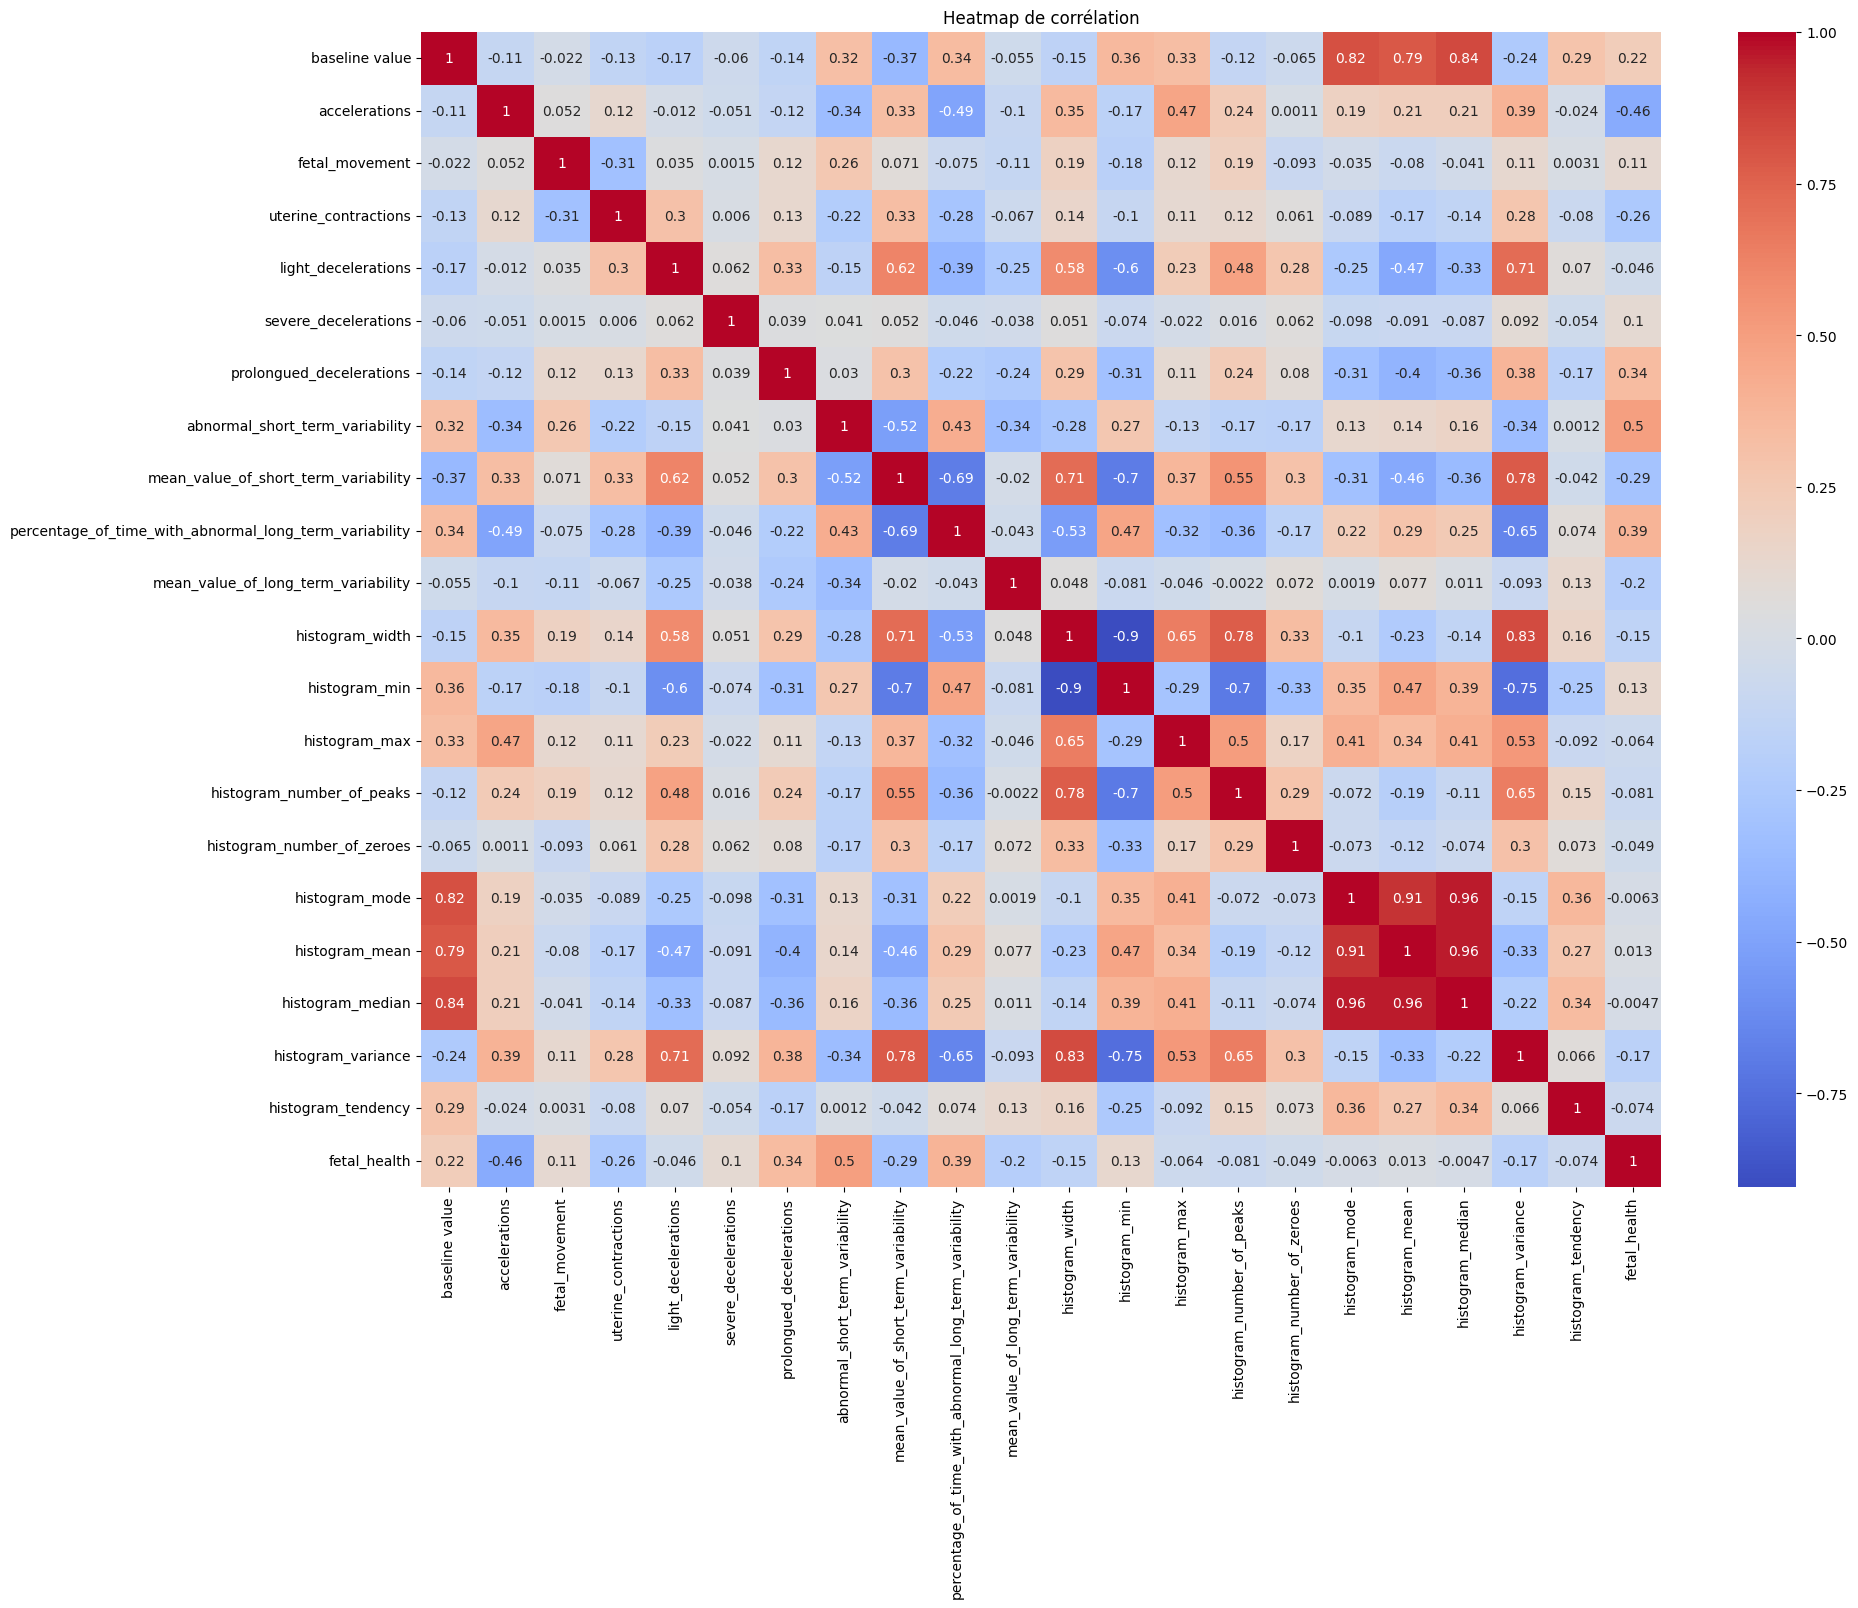

In [ ]:
# Matrice de corrélation
corr = data.corr(method = "spearman")
# Afficher la carte de chaleur
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de corrélation")
plt.show()

###### 5.3- Test d'hypothèse:
    Dans les tests d'hypothèses statistiques, l'hypothèse nulle représente généralement l'absence d'effet ou de relation entre les variables. Dans ce contexte, l'hypothèse nulle pourrait être :

    Il n'y a pas de relation significative entre les caractéristiques CTG et l'état de santé du fœtus. Plus précisément, nous pourrions formuler l'hypothèse nulle comme suit :

    H0 : Les valeurs moyennes des caractéristiques CTG sont les mêmes pour toutes les classes de santé fœtale, et toute différence observée est due au hasard.

    Pour tester cette hypothèse nulle, nous pourrions effectuer une analyse de variance (ANOVA) ou un autre test statistique approprié pour comparer les moyennes des caractéristiques CTG dans les différentes classes de santé fœtale. Si nous rejetons l'hypothèse nulle, nous conclurions qu'il existe une relation significative entre les caractéristiques CTG et l'état de santé fœtal.
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
from scipy.stats import f_oneway
# Diviser les données en groupes selon la classe de santé fœtale
group1 = data[data['fetal_health'] == 1].iloc[:, 0:21]
group2 = data[data['fetal_health'] == 2].iloc[:, 0:21]
group3 = data[data['fetal_health'] == 3].iloc[:, 0:21]

# Initialiser une liste pour stocker les résultats du test F et les valeurs p pour chaque caractéristique CTG
f_stats = []
p_values = []

# Effectuer une boucle sur chaque caractéristique CTG pour effectuer l'ANOVA à une voie
for col in group1.columns:
    f_statistic, p_value = f_oneway(group1[col], group2[col], group3[col])
    f_stats.append(f_statistic)
    p_values.append(p_value)

# Afficher les résultats pour chaque caractéristique CTG
for i in range(len(f_stats)):
    print("Feature: ", group1.columns[i])
    print("F-statistic:", f_stats[i]," | p-value:", p_values[i])
    print("-------------------------------------------------------------------------------------------------------")


Feature:  baseline value
F-statistic: 140.62107554190104  | p-value: 4.457097803013098e-58
-------------------------------------------------------------------------------------------------------
Feature:  accelerations
F-statistic: 196.02752285786093  | p-value: 7.520612441197657e-79
-------------------------------------------------------------------------------------------------------
Feature:  fetal_movement
F-statistic: 11.679796736026343  | p-value: 9.020532301353381e-06
-------------------------------------------------------------------------------------------------------
Feature:  uterine_contractions
F-statistic: 93.7157434296913  | p-value: 9.935710778472604e-40
-------------------------------------------------------------------------------------------------------
Feature:  light_decelerations
F-statistic: 66.864754399964  | p-value: 6.901148044792995e-29
-------------------------------------------------------------------------------------------------------
Feature:  severe_dec

#### 6.Visualiser les variables choisi avec la variable cible:
    Pour visualiser la relation entre chacune de ces caractéristiques CTG et la variable de santé fœtale, on peut utiliser des graphiques tels que des histogrammes ou des diagrammes en boîte.
    -----------------------------------------------------------------------------------------------------------------------

###### 6.1 Histogrammes:
    Tracer un histogramme pour chaque caractéristique CTG en fonction de la variable de santé fœtale
    ----------------------------------------------------------------------------------------------------------------------

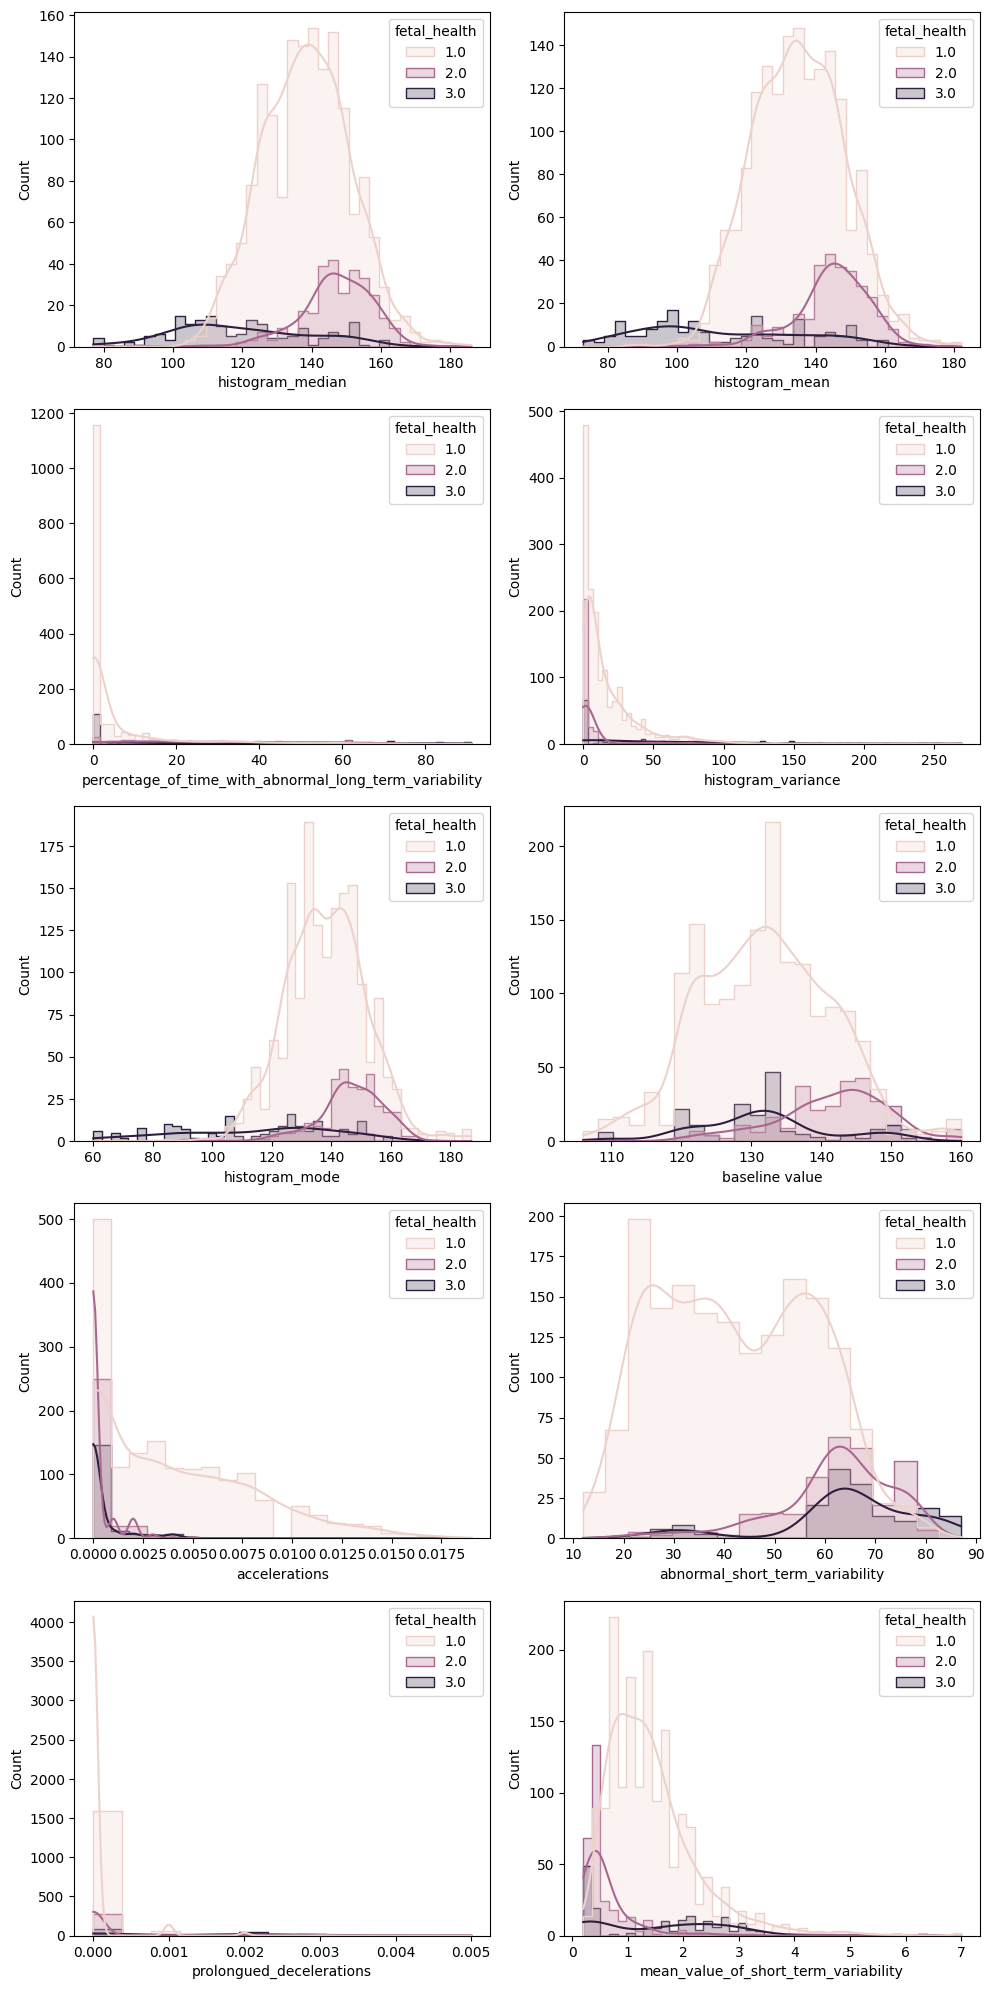

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20), dpi=100)

# Flatten the axs array to easily iterate over each subplot
axs = axs.flatten()

# Define the features
features = ['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability',
            'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations',
            'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']

# Iterate over each feature and plot the histogram in each subplot
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue='fetal_health', element='step', kde=True, ax=axs[i])

plt.tight_layout()
plt.show()

###### 6.2 diagramme en boîte:

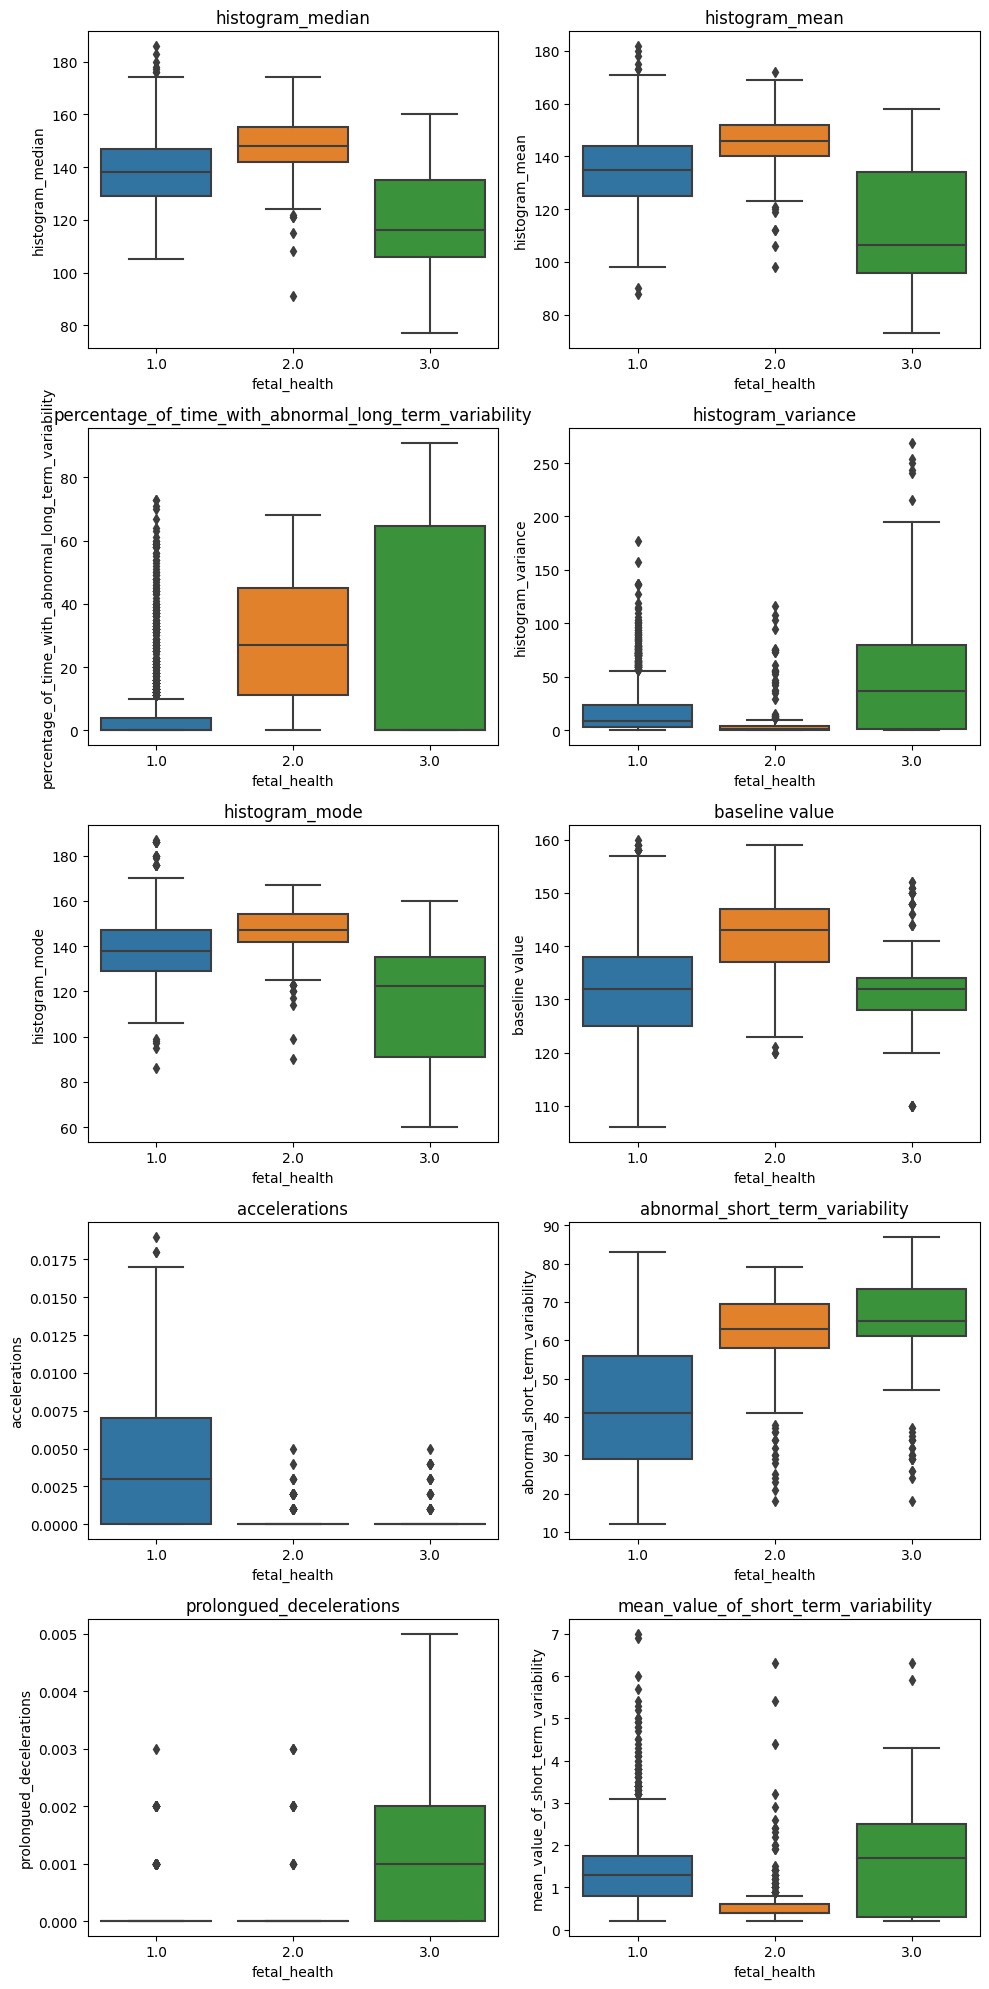

In [ ]:

# Create a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each feature and plot the boxplot in the corresponding subplot
for i, feature in enumerate(['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability',
                             'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations',
                             'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']):
    sns.boxplot(data=data, x='fetal_health', y=feature, ax=axes[i])
    axes[i].set_title(feature)

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()

## II.Modèles de classification et de clustering :
    Maintenant on va  utiliser une variété d'algorithmes de classification et de clustering pour résoudre les problèmes dans notre domaine .
    -----------------------------------------------------------------------------------------------------------------------

#### 1.Séparer les variables indépendantes et la variable dépendante
    On va diviser les données en variables d'entrée (X) et variable cible (Y)
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
X =data.loc[: ,['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability',
                'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations',
                'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']]

X_all = data.drop('fetal_health', axis=1)
Y = data['fetal_health']

#### 2. Division du jeu de données :
    On va diviser les données en ensembles de formation et de test
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
X_all_train, X_all_test, Y_all_train, Y_all_test = train_test_split(X_all, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 3.  Normaliser les variables numériques
    on va appliquer la normalisation des données aux variables d'entrée
    -----------------------------------------------------------------------------------------------------------------------


In [ ]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(X)
X_train_selected = scaler.fit_transform(X_train)
X_test_selected = scaler.transform(X_test)

X_all = scaler.fit_transform(X_all)
X_all_train = scaler.fit_transform(X_all_train)
X_all_test = scaler.transform(X_all_test)

#### 4. ACP
    On va utiliser l'analyse en composantes principales (PCA) pour réduire la dimensionnalité des données

In [ ]:
# Analyse en composantes principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)


    Après avoir effectué l'ACP, on peut afficher un graphique de dispersion pour visualiser les données dans les deux premières dimensions principales.

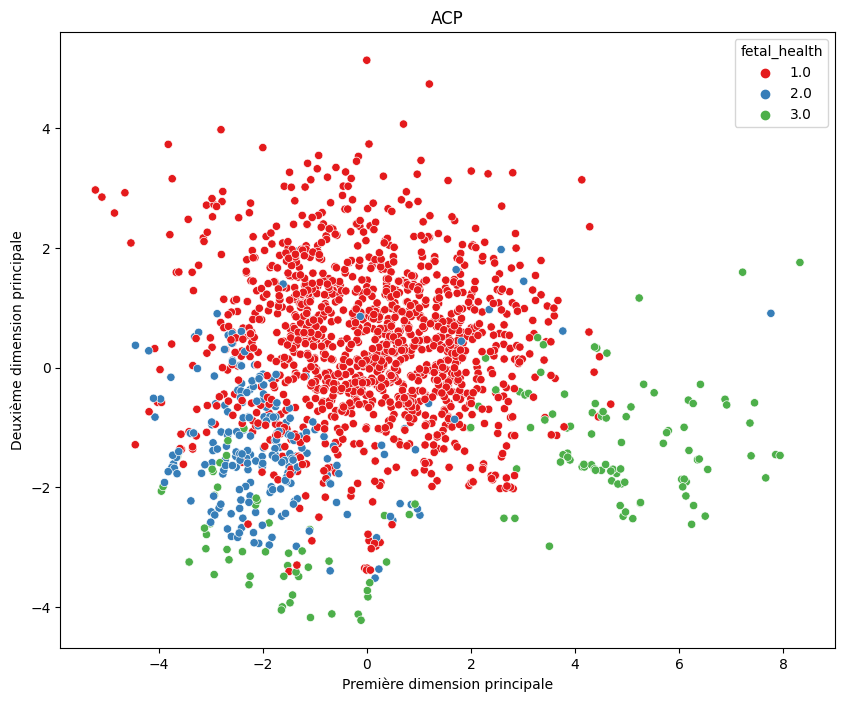

In [ ]:
# Afficher le graphique de dispersion pour les deux premières dimensions principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=Y_train, palette="Set1")
plt.xlabel("Première dimension principale")
plt.ylabel("Deuxième dimension principale")
plt.title("ACP")
plt.show()


## II.1.  Classification:
    On va commencer par les méthodes de ML supérvise de classification
    -----------------------------------------------------------------------------------------------------------------------

### II. 1 .1. Entraînement :
    On va créer différents modèle de machine learning afin de comparer leurs performances aprés ,
    -----------------------------------------------------------------------------------------------------------------------

##### 1 With feature selection 1:
    avec les variables choisit:
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model_1_with = KNeighborsClassifier(n_neighbors=1)
model_1_with.fit(X_train_selected, Y_train)
Y_predec_model_1_with =model_1_with.predict(X_test_selected)
Y_predec_model_1_with_train =model_1_with.predict(X_train_selected)


In [ ]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier
model_2_with = DecisionTreeClassifier(max_depth=7,random_state=42)
model_2_with.fit(X_train_selected, Y_train)
Y_predec_model_2_with =model_2_with.predict(X_test_selected)
Y_predec_model_2_with_train =model_2_with.predict(X_train_selected)

In [ ]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
model_3_with = LogisticRegression(C=10,random_state=0)
model_3_with.fit(X_train_selected, Y_train)
Y_predec_model_3_with =model_3_with.predict(X_test_selected)
Y_predec_model_3_with_train =model_3_with.predict(X_train_selected)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Forêt aléatoire

from sklearn.ensemble import RandomForestClassifier
model_4_with = RandomForestClassifier(n_estimators=115, random_state=0)
model_4_with.fit(X_train_selected, Y_train)
Y_predec_model_4_with =model_4_with.predict(X_test_selected)
Y_predec_model_4_with_train =model_4_with.predict(X_train_selected)

In [ ]:
# SVM

from sklearn.svm import LinearSVC
model_5_with = LinearSVC(C=1,random_state=0)
model_5_with.fit(X_train_selected, Y_train)
Y_predec_model_5_with =model_5_with.predict(X_test_selected)
Y_predec_model_5_with_train =model_5_with.predict(X_train_selected)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_6_with = GaussianNB(var_smoothing=1e-09)
model_6_with.fit(X_train_selected, Y_train)
Y_predec_model_6_with =model_6_with.predict(X_test_selected)
Y_predec_model_6_with_train =model_6_with.predict(X_train_selected)

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth=7),
    'Logistic Regression': LogisticRegression(random_state=0,C=10),
    'Random Forest': RandomForestClassifier(n_estimators=115, random_state=0),
    'SVM': LinearSVC(random_state=0, tol=1e-5,C=1),
    'Naive Bayes': GaussianNB(var_smoothing=1e-09)
}

scoring = 'accuracy' # choose your desired scoring metric

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, Y_train, cv=5, scoring=scoring)
    results[name] = scores.mean()

best_model = max(results, key=results.get)
print('Results:', results)
print('Best model:', best_model)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Results: {'KNN': 0.9270588235294117, 'Decision Tree': 0.9288235294117648, 'Logistic Regression': 0.8876470588235292, 'Random Forest': 0.9464705882352942, 'SVM': 0.8817647058823528, 'Naive Bayes': 0.8464705882352941}
Best model: Random Forest


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### 2 With feature selection 2:
    avec les deux composantes APC
    -------------------------------------------------------------------------------------------------------------------------

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model_1_withacp = KNeighborsClassifier(n_neighbors=10)
model_1_withacp.fit(X_train_pca, Y_train)
Y_predec_model_1_withacp =model_1_withacp.predict(X_test_pca)
Y_predec_model_1_withacp_train =model_1_withacp.predict(X_train_pca)

In [ ]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier
model_2_withacp = DecisionTreeClassifier(random_state=42,max_depth=6)
model_2_withacp.fit(X_train_pca, Y_train)
Y_predec_model_2_withacp =model_2_withacp.predict(X_test_pca)
Y_predec_model_2_withacp_train =model_2_withacp.predict(X_train_pca)

In [ ]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
model_3_withacp = LogisticRegression(random_state=0,C=1)
model_3_withacp.fit(X_train_pca, Y_train)
Y_predec_model_3_withacp =model_3_withacp.predict(X_test_pca)
Y_predec_model_3_withacp_train =model_3_withacp.predict(X_train_pca)

In [ ]:
# Forêt aléatoire

from sklearn.ensemble import RandomForestClassifier
model_4_withacp = RandomForestClassifier(n_estimators=74, random_state=0)
model_4_withacp.fit(X_train_pca, Y_train)
Y_predec_model_4_withacp =model_4_withacp.predict(X_test_pca)
Y_predec_model_4_withacp_train =model_4_withacp.predict(X_train_pca)

In [ ]:
# SVM

from sklearn.svm import LinearSVC
model_5_withacp = LinearSVC(random_state=0, tol=1e-5,C=1)
model_5_withacp.fit(X_train_pca, Y_train)
Y_predec_model_5_withacp =model_5_withacp.predict(X_test_pca)
Y_predec_model_5_withacp_train =model_5_withacp.predict(X_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_6_withacp = GaussianNB(var_smoothing= 1e-09)
model_6_withacp.fit(X_train_pca, Y_train)
Y_predec_model_6_withacp =model_6_withacp.predict(X_test_pca)
Y_predec_model_6_withacp_train =model_6_withacp.predict(X_train_pca)

In [ ]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth=6),
    'Logistic Regression': LogisticRegression(random_state=0,C=1),
    'Random Forest': RandomForestClassifier(n_estimators=74, random_state=0),
    'SVM': LinearSVC(random_state=0, tol=1e-5,C=1),
    'Naive Bayes': GaussianNB(var_smoothing=1e-09)
}

scoring = 'accuracy' # choose your desired scoring metric

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_pca, Y_train, cv=5, scoring=scoring)
    results[name] = scores.mean()

best_model = max(results, key=results.get)
print('Results:', results)
print('Best model:', best_model)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results: {'KNN': 0.8741176470588237, 'Decision Tree': 0.8670588235294119, 'Logistic Regression': 0.846470588235294, 'Random Forest': 0.8758823529411766, 'SVM': 0.8299999999999998, 'Naive Bayes': 0.858235294117647}
Best model: Random Forest


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### 3 Without feature selection:
    avec toutes les variables
    -------------------------------------------------------------------------------------------------------------------------

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model_1_without = KNeighborsClassifier(n_neighbors=1)
model_1_without.fit(X_all_train, Y_all_train)
Y_predec_model_1_without =model_1_without.predict(X_all_test)
Y_predec_model_1_without_train =model_1_without.predict(X_all_train)

In [ ]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier
model_2_without = DecisionTreeClassifier(random_state=42,max_depth=10)
model_2_without.fit(X_all_train, Y_all_train)
Y_predec_model_2_without =model_2_without.predict(X_all_test)
Y_predec_model_2_without_train =model_2_without.predict(X_all_train)

In [ ]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
model_3_without = LogisticRegression(random_state=0,C=10)
model_3_without.fit(X_all_train, Y_all_train)
Y_predec_model_3_without =model_3_without.predict(X_all_test)
Y_predec_model_3_without_train =model_3_without.predict(X_all_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Forêt aléatoire

from sklearn.ensemble import RandomForestClassifier
model_4_without = RandomForestClassifier(n_estimators=91, random_state=0)
model_4_without.fit(X_all_train, Y_all_train)
Y_predec_model_4_without =model_4_without.predict(X_all_test)
Y_predec_model_4_without_train =model_4_without.predict(X_all_train)

In [ ]:
# SVM

from sklearn.svm import LinearSVC
model_5_without = LinearSVC(random_state=0, tol=1e-5,C=1)
model_5_without.fit(X_all_train, Y_all_train)
Y_predec_model_5_without =model_5_without.predict(X_all_test)
Y_predec_model_5_without_train =model_5_without.predict(X_all_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_6_without = GaussianNB(var_smoothing=1e-05)
model_6_without.fit(X_all_train, Y_all_train)
Y_predec_model_6_without =model_6_without.predict(X_all_test)
Y_predec_model_6_without_train =model_6_without.predict(X_all_train)

In [ ]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=0,C=10),
    'Random Forest': RandomForestClassifier(n_estimators=91, random_state=0),
    'lg':LinearSVC(random_state=0, tol=1e-5,C=1),
    'Naive Bayes': GaussianNB(var_smoothing=1e-05)
}

scoring = 'accuracy' # choose your desired scoring metric

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_all_train, Y_all_train, cv=5, scoring=scoring)
    results[name] = scores.mean()

best_model = max(results, key=results.get)
print('Results:', results)
print('Best model:', best_model)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Results: {'KNN': 0.8964705882352941, 'Decision Tree': 0.9164705882352943, 'Logistic Regression': 0.9, 'Random Forest': 0.9388235294117647, 'lg': 0.9011764705882352, 'Naive Bayes': 0.7929411764705883}
Best model: Random Forest


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### II. 1 .2. Évaluation :
    Après avoir construit des modèles, on va évaluer leurs performances en utilisant des métriques appropriées telles que la précision, le rappel et la F-mesure
    -----------------------------------------------------------------------------------------------------------------------

##### Mesures de performances:

###### 1 With feature selection 1:

In [ ]:
def plot_confusion_matrix(y_test,y_pred, cmap):
    classes=['class 1', 'class 2','class 3']
    # Créer la matrice de confusion
    conf_mat = confusion_matrix(y_test, y_pred)

    # Afficher la matrice de confusion avec les valeurs formatées
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(conf_mat, cmap=cmap)

    # Ajouter les valeurs dans la matrice de confusion
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], 'd'),
                    ha="center", va="center", color="white")

    # Ajouter les noms des classes et du graphe
    ax.set_title("Matrice de confusion")
    ax.set_xticks(range(conf_mat.shape[1]))
    ax.set_xticklabels(classes)
    ax.set_yticks(range(conf_mat.shape[0]))
    ax.set_yticklabels(classes)
    ax.set_ylabel('Vraie classe')
    ax.set_xlabel('Classe prédite')
    plt.colorbar(im)

    # Afficher la figure
    plt.show()



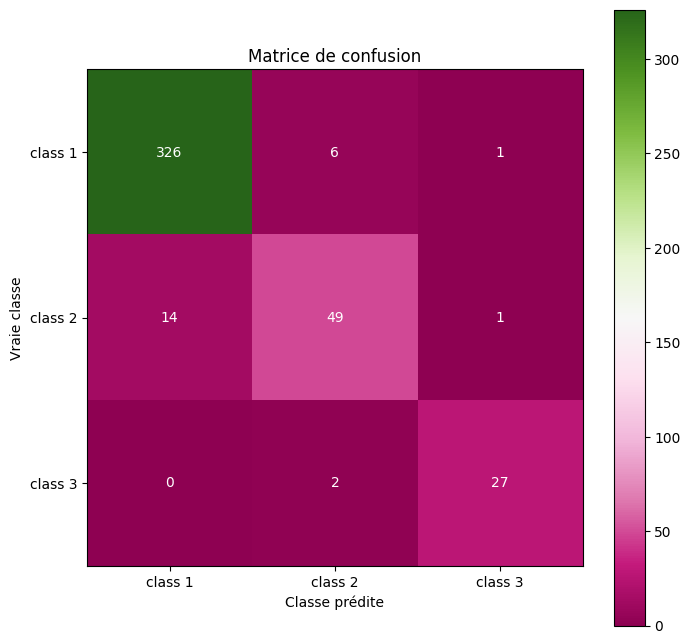

______________________________Train______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________Test______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.96      0.98      0.97       333
     class 2       0.86      0.77      0.81        64
     c

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2','class 3']


plot_confusion_matrix(Y_test,Y_predec_model_1_with, 'PiYG')

                        ###########################################
                        ############___KNeighborsClassifier___#####
                        ###########################################
print("______________________________Train______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_train, Y_predec_model_1_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_1_with_train))
# Calculer l'exactitude du modèle
accuracy_KNN_with = accuracy_score(Y_train, Y_predec_model_1_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_with)
print("______________________________Test______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_test, Y_predec_model_1_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_1_with))
# Calculer l'exactitude du modèle
accuracy_KNN_with = accuracy_score(Y_test, Y_predec_model_1_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_with)

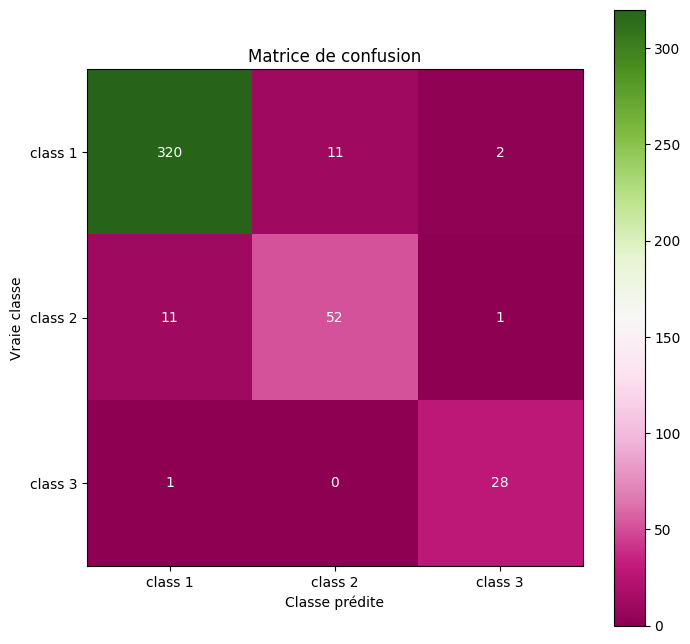

______________________________Train______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.97      0.99      0.98      1322
     class 2       0.89      0.85      0.87       231
     class 3       1.00      0.95      0.98       147

    accuracy                           0.96      1700
   macro avg       0.96      0.93      0.94      1700
weighted avg       0.96      0.96      0.96      1700

--------------------------------------------------------------------
[[1303   19    0]
 [  35  196    0]
 [   3    4  140]]
--------------------------------------------------------------------
Accuracy: 0.9641176470588235
______________________________Test______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.96      0.96      0.96       333
     class 2       0.83      0.81      0.

In [ ]:
                        ###########################################
                        ############___DecisionTreeClassifier___###
                        ###########################################

plot_confusion_matrix(Y_test,Y_predec_model_2_with, 'PiYG')
print("______________________________Train______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_train, Y_predec_model_2_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_2_with_train))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_with = accuracy_score(Y_train, Y_predec_model_2_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_with)
print("______________________________Test______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_test, Y_predec_model_2_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_2_with))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_with = accuracy_score(Y_test, Y_predec_model_2_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_with)

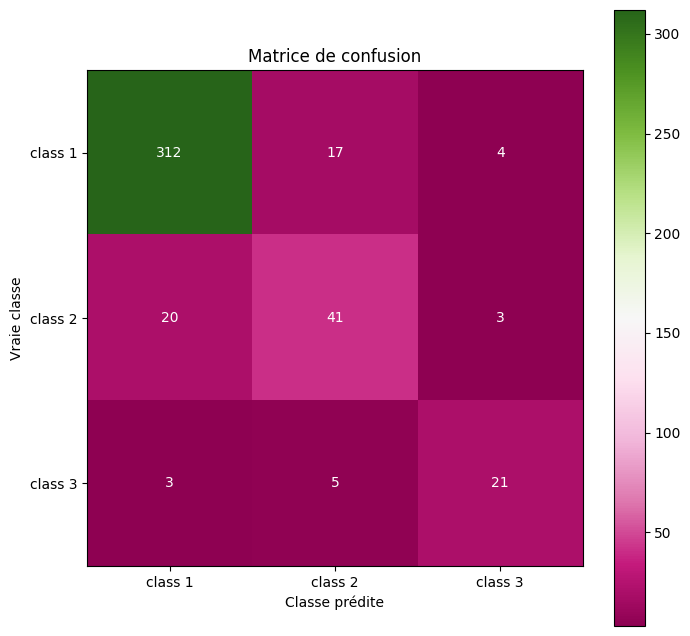

______________________________Train______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.94      0.95      0.94      1322
     class 2       0.64      0.60      0.62       231
     class 3       0.79      0.76      0.77       147

    accuracy                           0.89      1700
   macro avg       0.79      0.77      0.78      1700
weighted avg       0.88      0.89      0.88      1700

--------------------------------------------------------------------
[[1258   51   13]
 [  76  138   17]
 [   9   27  111]]
--------------------------------------------------------------------
Accuracy: 0.8864705882352941
______________________________test______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.93      0.94      0.93       333
     class 2       0.65      0.64      0.65      

In [ ]:
                        ###########################################
                        ############___LogisticRegression___#######
                        ###########################################

plot_confusion_matrix(Y_test,Y_predec_model_3_with, 'PiYG')
print("______________________________Train______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_train, Y_predec_model_3_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_3_with_train))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_with = accuracy_score(Y_train, Y_predec_model_3_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_with)
print("______________________________test______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_test, Y_predec_model_3_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_3_with))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_with = accuracy_score(Y_test, Y_predec_model_3_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_with)

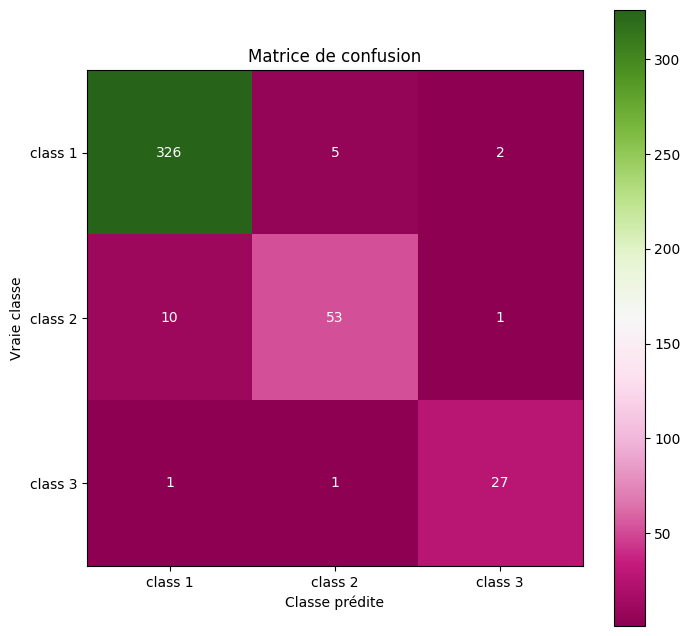

______________________________Train______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________test______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       0.97      0.98      0.97       333
     class 2       0.90      0.83      0.86        64
  

In [ ]:
                        ###########################################
                        ############___RandomForestClassifier___###
                        ###########################################


plot_confusion_matrix(Y_test,Y_predec_model_4_with, 'PiYG')
print("______________________________Train______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_train, Y_predec_model_4_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_4_with_train))
# Calculer l'exactitude du modèle
accuracy_RandomForest_with = accuracy_score(Y_train, Y_predec_model_4_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_with)
print("______________________________test______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_test, Y_predec_model_4_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_4_with))
# Calculer l'exactitude du modèle
accuracy_RandomForest_with = accuracy_score(Y_test, Y_predec_model_4_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_with)

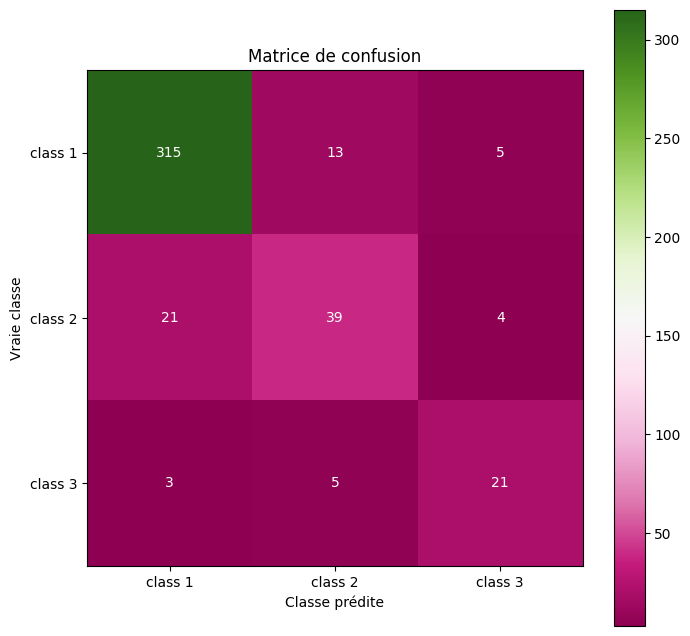

______________________________Train______________________________________
                      ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.93      0.95      0.94      1322
     class 2       0.64      0.57      0.60       231
     class 3       0.82      0.77      0.79       147

    accuracy                           0.89      1700
   macro avg       0.80      0.76      0.78      1700
weighted avg       0.88      0.89      0.88      1700

--------------------------------------------------------------------
[[1261   50   11]
 [  85  132   14]
 [  10   24  113]]
--------------------------------------------------------------------
Accuracy: 0.8858823529411765
______________________________Test______________________________________
               ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.93      0.95      0.94       333
     class 2       0.68      0.61 

In [ ]:
                        ###########################################
                        ####___Support Vector Machine (SVM) ___####
                        ###########################################

plot_confusion_matrix(Y_test,Y_predec_model_5_with, 'PiYG')
print("______________________________Train______________________________________")
print("                      ___Support Vector Machine (SVM)___")
print(classification_report(Y_train, Y_predec_model_5_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_5_with_train))
# Calculer l'exactitude du modèle
accuracy_SVM_with = accuracy_score(Y_train, Y_predec_model_5_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_with)
print("______________________________Test______________________________________")
print("               ___Support Vector Machine (SVM)___")
print(classification_report(Y_test, Y_predec_model_5_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_5_with))
# Calculer l'exactitude du modèle
accuracy_SVM_with = accuracy_score(Y_test, Y_predec_model_5_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_with)

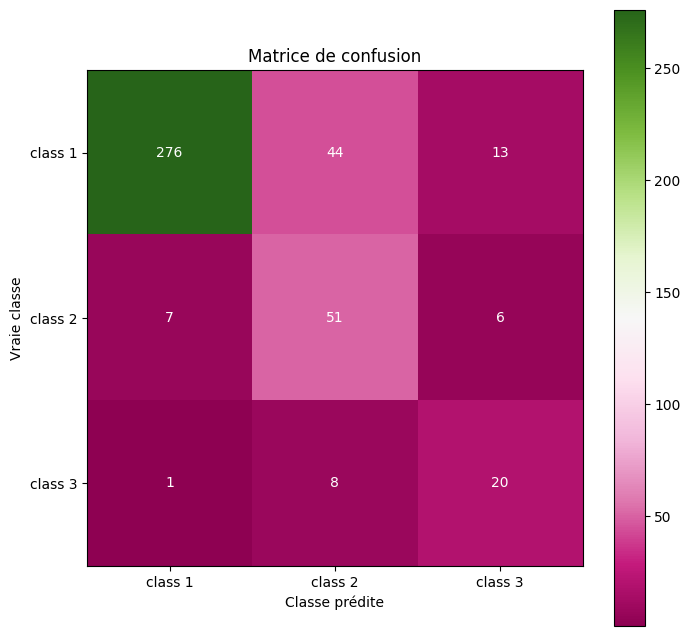

______________________________Train______________________________________
                      ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.97      0.87      0.92      1322
     class 2       0.53      0.84      0.65       231
     class 3       0.65      0.68      0.66       147

    accuracy                           0.85      1700
   macro avg       0.72      0.79      0.74      1700
weighted avg       0.89      0.85      0.86      1700

--------------------------------------------------------------------
[[1148  132   42]
 [  25  193   13]
 [   5   42  100]]
--------------------------------------------------------------------
Accuracy: 0.8476470588235294
______________________________Test______________________________________
               ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.97      0.83      0.89       333
     class 2       0.50      0.80      0.61        64


In [ ]:
                        ###########################################
                        ##########_______naive bayes _______#######
                        ###########################################

plot_confusion_matrix(Y_test,Y_predec_model_6_with, 'PiYG')
print("______________________________Train______________________________________")
print("                      ______Naives Bayes______")
print(classification_report(Y_train, Y_predec_model_6_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_6_with_train))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_with = accuracy_score(Y_train, Y_predec_model_6_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_with)
print("______________________________Test______________________________________")
print("               ______Naives Bayes______")
print(classification_report(Y_test, Y_predec_model_6_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_6_with))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_with = accuracy_score(Y_test, Y_predec_model_6_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_with)

###### 2 With feature selection 2:

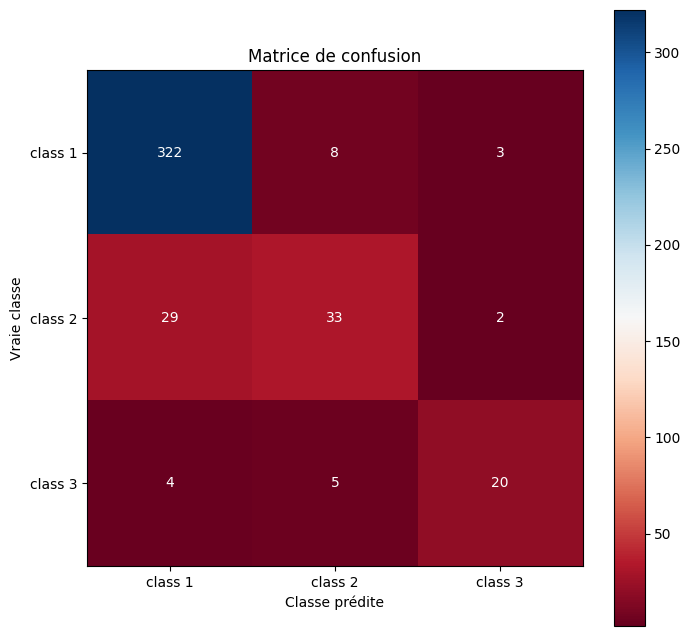

______________________________Train______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.92      0.97      0.94      1322
     class 2       0.71      0.58      0.64       231
     class 3       0.88      0.67      0.76       147

    accuracy                           0.89      1700
   macro avg       0.84      0.74      0.78      1700
weighted avg       0.89      0.89      0.89      1700

--------------------------------------------------------------------
[[1282   29   11]
 [  93  135    3]
 [  24   25   98]]
--------------------------------------------------------------------
Accuracy: 0.8911764705882353
______________________________Test______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.91      0.97      0.94       333
     class 2       0.72      0.52      0.60  

In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_1_withacp, 'RdBu')

                        ###########################################
                        ############___KNeighborsClassifier___#####
                        ###########################################
print("______________________________Train______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_train, Y_predec_model_1_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_1_withacp_train))
# Calculer l'exactitude du modèle
accuracy_KNN_withacp = accuracy_score(Y_train, Y_predec_model_1_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_withacp)
print("______________________________Test______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_test, Y_predec_model_1_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_1_withacp))
# Calculer l'exactitude du modèle
accuracy_KNN_withacp = accuracy_score(Y_test, Y_predec_model_1_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_withacp)

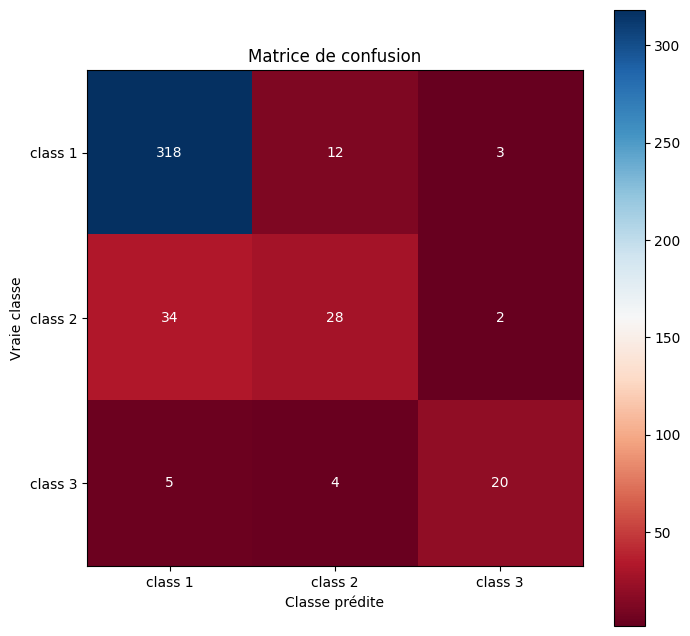

______________________________Train______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.93      0.97      0.95      1322
     class 2       0.71      0.64      0.67       231
     class 3       0.99      0.73      0.84       147

    accuracy                           0.90      1700
   macro avg       0.88      0.78      0.82      1700
weighted avg       0.90      0.90      0.90      1700

--------------------------------------------------------------------
[[1282   39    1]
 [  83  148    0]
 [  17   22  108]]
--------------------------------------------------------------------
Accuracy: 0.9047058823529411
______________________________Test______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.89      0.95      0.92       333
     class 2       0.64      0.44      0.

In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_2_withacp, 'RdBu')
                        ###########################################
                        ############___DecisionTreeClassifier___###
                        ###########################################
print("______________________________Train______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_train, Y_predec_model_2_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_2_withacp_train))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_withacp = accuracy_score(Y_train, Y_predec_model_2_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_withacp)
print("______________________________Test______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_test, Y_predec_model_2_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_2_withacp))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_withacp = accuracy_score(Y_test, Y_predec_model_2_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_withacp)

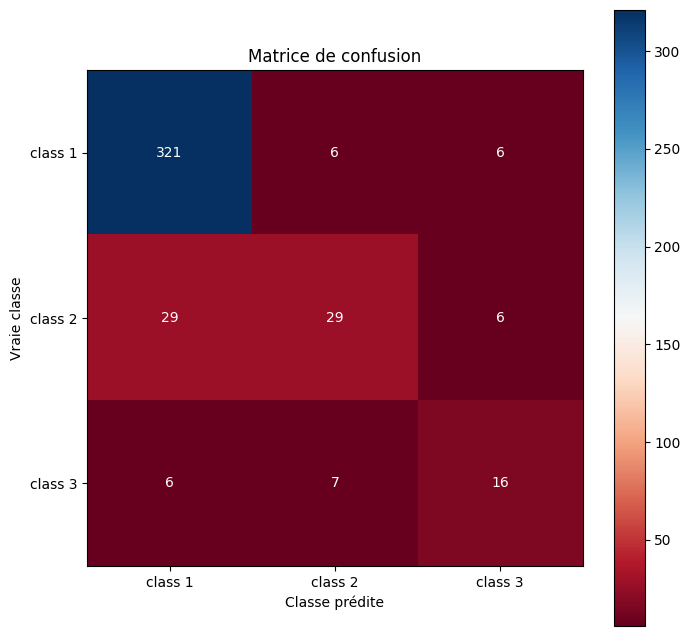

______________________________Train______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.89      0.96      0.92      1322
     class 2       0.62      0.42      0.50       231
     class 3       0.66      0.53      0.59       147

    accuracy                           0.85      1700
   macro avg       0.72      0.64      0.67      1700
weighted avg       0.83      0.85      0.84      1700

--------------------------------------------------------------------
[[1265   26   31]
 [ 123   98   10]
 [  35   34   78]]
--------------------------------------------------------------------
Accuracy: 0.8476470588235294
______________________________test______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.90      0.96      0.93       333
     class 2       0.69      0.45      0.55      

In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_3_withacp, 'RdBu')
                        ###########################################
                        ############___LogisticRegression___#######
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_train, Y_predec_model_3_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_3_withacp_train))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_withacp = accuracy_score(Y_train, Y_predec_model_3_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_withacp)
print("______________________________test______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_test, Y_predec_model_3_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_3_withacp))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_withacp = accuracy_score(Y_test, Y_predec_model_3_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_withacp)

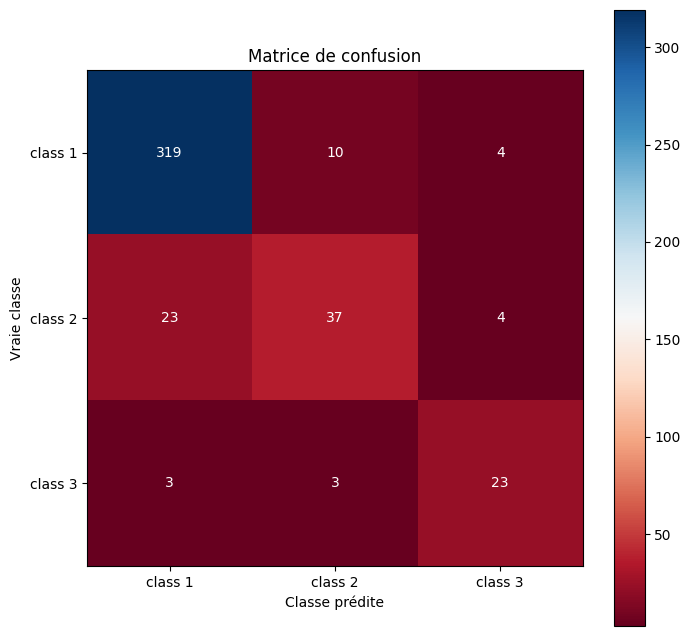

______________________________Train______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      0.99      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   1    0  146]]
--------------------------------------------------------------------
Accuracy: 0.9994117647058823
______________________________test______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       0.92      0.96      0.94       333
     class 2       0.74      0.58      0.

In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_4_withacp, 'RdBu')
                        ###########################################
                        ############___RandomForestClassifier___###
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_train, Y_predec_model_4_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_4_withacp_train))
# Calculer l'exactitude du modèle
accuracy_RandomForest_withacp = accuracy_score(Y_train, Y_predec_model_4_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_withacp)
print("______________________________test______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_test, Y_predec_model_4_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_4_withacp))
# Calculer l'exactitude du modèle
accuracy_RandomForest_withacp = accuracy_score(Y_test, Y_predec_model_4_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_withacp)

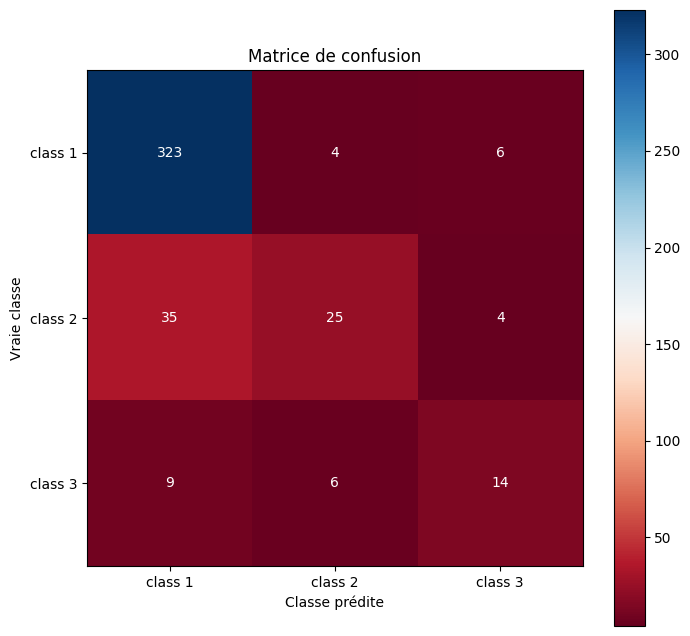

______________________________Train______________________________________
                      ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.87      0.97      0.91      1322
     class 2       0.58      0.29      0.39       231
     class 3       0.63      0.46      0.53       147

    accuracy                           0.83      1700
   macro avg       0.69      0.57      0.61      1700
weighted avg       0.81      0.83      0.81      1700

--------------------------------------------------------------------
[[1279   13   30]
 [ 153   68   10]
 [  43   37   67]]
--------------------------------------------------------------------
Accuracy: 0.831764705882353
______________________________Test______________________________________
               ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.88      0.97      0.92       333
     class 2       0.71      0.39  

In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_5_withacp, 'RdBu')
                        ###########################################
                        ####___Support Vector Machine (SVM) ___####
                        ###########################################

print("______________________________Train______________________________________")
print("                      ___Support Vector Machine (SVM)___")
print(classification_report(Y_train, Y_predec_model_5_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_5_withacp_train))
# Calculer l'exactitude du modèle
accuracy_SVM_withacp = accuracy_score(Y_train, Y_predec_model_5_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_withacp)
print("______________________________Test______________________________________")
print("               ___Support Vector Machine (SVM)___")
print(classification_report(Y_test, Y_predec_model_5_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_5_withacp))
# Calculer l'exactitude du modèle
accuracy_SVM_withacp = accuracy_score(Y_test, Y_predec_model_5_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_withacp)

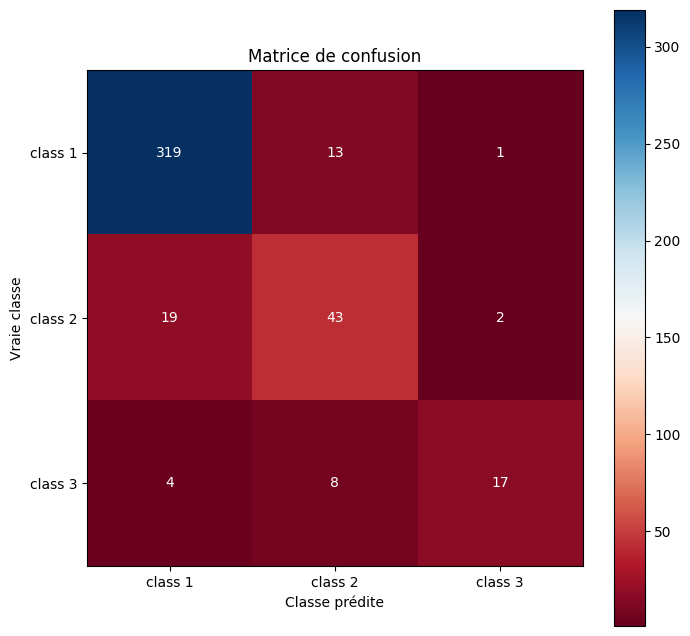

______________________________Train______________________________________
                      ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.91      0.95      0.93      1322
     class 2       0.59      0.55      0.57       231
     class 3       0.79      0.56      0.65       147

    accuracy                           0.86      1700
   macro avg       0.76      0.68      0.72      1700
weighted avg       0.86      0.86      0.86      1700

--------------------------------------------------------------------
[[1258   45   19]
 [ 102  126    3]
 [  24   41   82]]
--------------------------------------------------------------------
Accuracy: 0.8623529411764705
______________________________Test______________________________________
               ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.93      0.96      0.95       333
     class 2       0.67      0.67      0.67        64


In [ ]:
plot_confusion_matrix(Y_test, Y_predec_model_6_withacp, 'RdBu')
                        ###########################################
                        ##########_______naive bayes _______#######
                        ###########################################

print("______________________________Train______________________________________")
print("                      ______Naives Bayes______")
print(classification_report(Y_train, Y_predec_model_6_withacp_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_6_withacp_train))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_withacp = accuracy_score(Y_train, Y_predec_model_6_withacp_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_withacp)
print("______________________________Test______________________________________")
print("               ______Naives Bayes______")
print(classification_report(Y_test, Y_predec_model_6_withacp, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_6_withacp))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_withacp = accuracy_score(Y_test, Y_predec_model_6_withacp)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_withacp)

###### 3 Without feature selection:

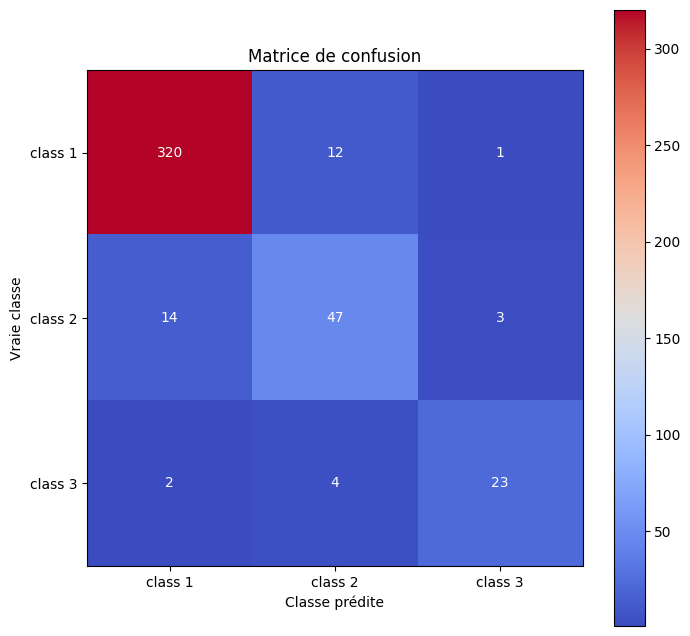

______________________________Train______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________Test______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.95      0.96      0.96       333
     class 2       0.75      0.73      0.74        64
     c

In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_1_without, 'coolwarm')
                        ###########################################
                        ############___KNeighborsClassifier___#####
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_all_train, Y_predec_model_1_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_1_without_train))
# Calculer l'exactitude du modèle
accuracy_KNN_without = accuracy_score(Y_all_train, Y_predec_model_1_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_without)
print("______________________________Test______________________________________")
print("                     ___KNeighborsClassifier___")
print(classification_report(Y_all_test, Y_predec_model_1_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_1_without))
# Calculer l'exactitude du modèle
accuracy_KNN_without = accuracy_score(Y_all_test, Y_predec_model_1_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_without)

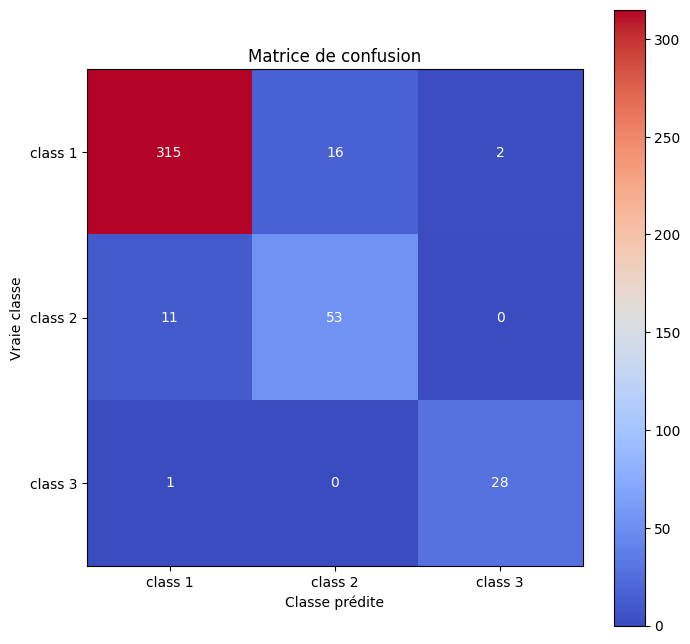

______________________________Train______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.99      1.00      0.99      1322
     class 2       0.98      0.94      0.96       231
     class 3       1.00      0.99      1.00       147

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.98      1700
weighted avg       0.99      0.99      0.99      1700

--------------------------------------------------------------------
[[1319    3    0]
 [  15  216    0]
 [   0    1  146]]
--------------------------------------------------------------------
Accuracy: 0.9888235294117647
______________________________Test______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.96      0.95      0.95       333
     class 2       0.77      0.83      0.

In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_2_without, 'coolwarm')
                        ###########################################
                        ############___DecisionTreeClassifier___###
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_all_train, Y_predec_model_2_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_2_without_train))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_without = accuracy_score(Y_all_train, Y_predec_model_2_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_without)
print("______________________________Test______________________________________")
print("                     ___DecisionTreeClassifier___")
print(classification_report(Y_all_test, Y_predec_model_2_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_2_without))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_without = accuracy_score(Y_all_test, Y_predec_model_2_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_without)

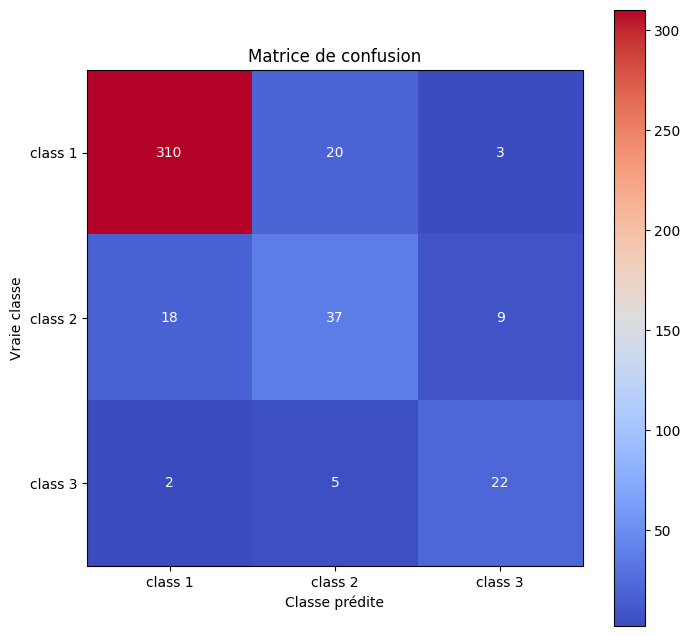

______________________________Train______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.95      0.96      0.95      1322
     class 2       0.69      0.68      0.69       231
     class 3       0.84      0.82      0.83       147

    accuracy                           0.91      1700
   macro avg       0.83      0.82      0.82      1700
weighted avg       0.91      0.91      0.91      1700

--------------------------------------------------------------------
[[1263   52    7]
 [  57  158   16]
 [   7   20  120]]
--------------------------------------------------------------------
Accuracy: 0.9064705882352941
______________________________Test______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.94      0.93      0.94       333
     class 2       0.60      0.58      0.59      

In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_3_without, 'coolwarm')
                        ###########################################
                        ############___LogisticRegression___#######
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_all_train, Y_predec_model_3_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_3_without_train))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_without = accuracy_score(Y_all_train, Y_predec_model_3_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_without)
print("______________________________Test______________________________________")
print("                     ___LogisticRegression___")
print(classification_report(Y_all_test, Y_predec_model_3_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_3_without))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_without = accuracy_score(Y_all_test, Y_predec_model_3_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_without)

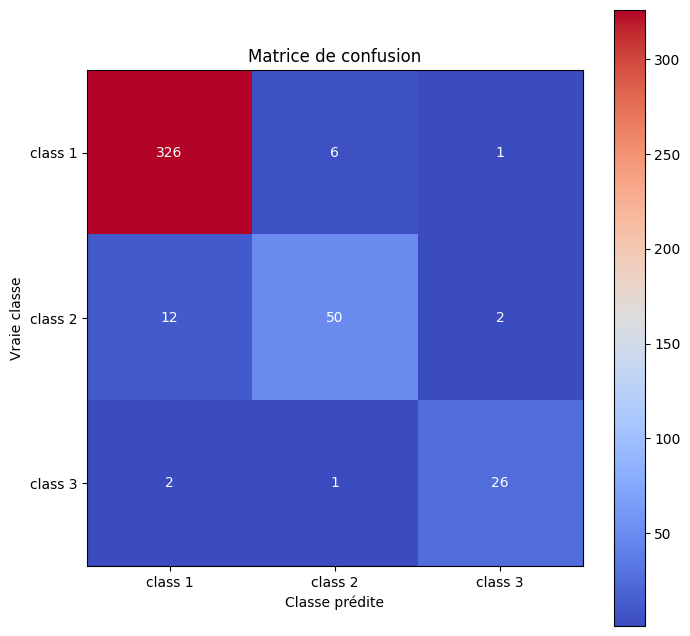

______________________________Train______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________Test______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       0.96      0.98      0.97       333
     class 2       0.88      0.78      0.83        64
  

In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_4_without, 'coolwarm')
                        ###########################################
                       ############___RandomForestClassifier___###
                       ###########################################

print("______________________________Train______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_all_train, Y_predec_model_4_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_4_without_train))
# Calculer l'exactitude du modèle
accuracy_RandomForest_without = accuracy_score(Y_all_train, Y_predec_model_4_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_without)
print("______________________________Test______________________________________")
print("                     ___RandomForestClassifier___")
print(classification_report(Y_all_test, Y_predec_model_4_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_4_without))
# Calculer l'exactitude du modèle
accuracy_RandomForest_without = accuracy_score(Y_all_test, Y_predec_model_4_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_without)

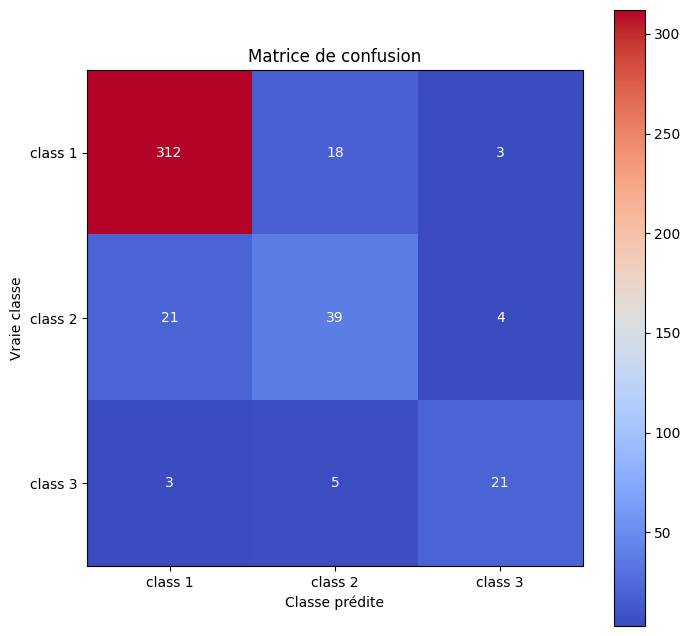

______________________________Train______________________________________
                     ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.94      0.97      0.96      1322
     class 2       0.72      0.67      0.69       231
     class 3       0.88      0.79      0.83       147

    accuracy                           0.91      1700
   macro avg       0.85      0.81      0.83      1700
weighted avg       0.91      0.91      0.91      1700

--------------------------------------------------------------------
[[1278   40    4]
 [  65  154   12]
 [  10   21  116]]
--------------------------------------------------------------------
Accuracy: 0.9105882352941177
______________________________Test______________________________________
               ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.93      0.94      0.93       333
     class 2       0.63      0.61  

In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_5_without, 'coolwarm')
                        ###########################################
                        ####___Support Vector Machine (SVM) ___####
                        ###########################################

print("______________________________Train______________________________________")
print("                     ___Support Vector Machine (SVM)___")
print(classification_report(Y_all_train, Y_predec_model_5_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_5_without_train))
# Calculer l'exactitude du modèle
accuracy_SVM_without = accuracy_score(Y_all_train, Y_predec_model_5_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_without)
print("______________________________Test______________________________________")
print("               ___Support Vector Machine (SVM)___")
print(classification_report(Y_all_test, Y_predec_model_5_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_5_without))
# Calculer l'exactitude du modèle
accuracy_SVM_without = accuracy_score(Y_all_test, Y_predec_model_5_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_without)

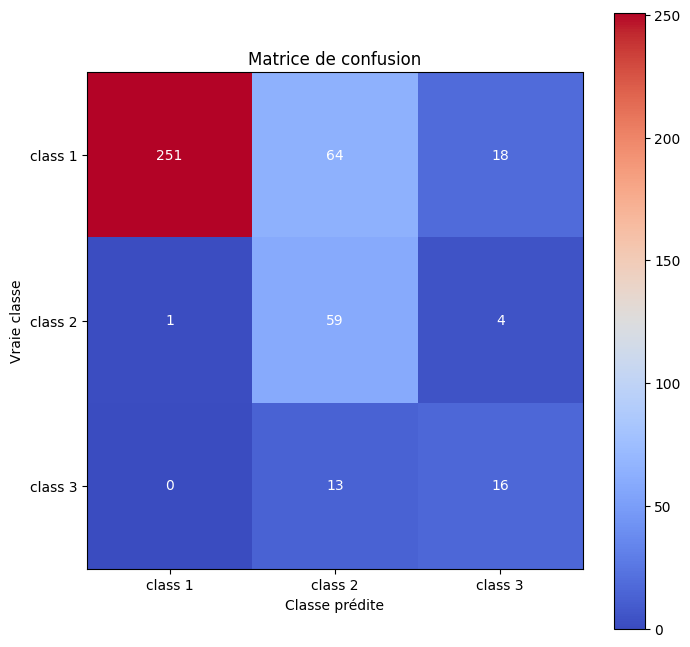

______________________________Train______________________________________
                      ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.99      0.78      0.87      1322
     class 2       0.41      0.92      0.57       231
     class 3       0.63      0.63      0.63       147

    accuracy                           0.78      1700
   macro avg       0.68      0.78      0.69      1700
weighted avg       0.88      0.78      0.81      1700

--------------------------------------------------------------------
[[1026  253   43]
 [   7  213   11]
 [   4   50   93]]
--------------------------------------------------------------------
Accuracy: 0.7835294117647059
______________________________Test______________________________________
               ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       1.00      0.75      0.86       333
     class 2       0.43      0.92      0.59        64


In [ ]:
plot_confusion_matrix(Y_all_test, Y_predec_model_6_without, 'coolwarm')
                        ###########################################
                        ##########_______naive bayes _______#######
                        ###########################################

print("______________________________Train______________________________________")
print("                      ______Naives Bayes______")
print(classification_report(Y_all_train, Y_predec_model_6_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_train, Y_predec_model_6_without_train))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_without = accuracy_score(Y_all_train, Y_predec_model_6_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_without)
print("______________________________Test______________________________________")
print("               ______Naives Bayes______")
print(classification_report(Y_all_test, Y_predec_model_6_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_all_test, Y_predec_model_6_without))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_without = accuracy_score(Y_all_test, Y_predec_model_6_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_without)

### II. 1 .3. Amélioration :

##### 1 with feature selection 1:

In [ ]:
##### a. Using GridSearchCV to find the best hyperparameters for
#the KNN classifier.Varying the number of neighbors from 1 to 10 and using 5-fold cross-validation.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(model_1_with, param_grid, cv=5)

grid_search.fit(X_train_selected, Y_train)

print("                     ___KNeighborsClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___KNeighborsClassifier___
______________________________________________________
Best hyperparameters:  {'n_neighbors': 1}
Best accuracy score:  0.9270588235294117


In [ ]:
#### b. Using GridSearchCV to find the best hyperparameters for
#the Decision Tree classifier. Varying the maximum depth from 1 to 10 and using 5-fold cross_validation.
param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(model_2_with, param_grid, cv=5)

grid_search.fit(X_train_selected, Y_train)
print("                     ___DecisionTreeClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___DecisionTreeClassifier___
______________________________________________________
Best hyperparameters:  {'max_depth': 7}
Best accuracy score:  0.9288235294117648


In [ ]:
#### c. Using GridSearchCV to find the best hyperparameters for the Logistic Regression classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_3_with, param_grid, cv=5)

grid_search.fit(X_train_selected, Y_train)
print("                     ___LogisticRegression___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___LogisticRegression___
______________________________________________________
Best hyperparameters:  {'C': 10}
Best accuracy score:  0.8876470588235292


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
#### d. Using GridSearchCV to find the best hyperparameters for the Random Forest classifier.
# Varying the number of trees from 50 to 200 and using 5-fold cross-validation.
param_grid = {'n_estimators': range(50, 201)}
grid_search = GridSearchCV(model_4_with, param_grid, cv=5)

grid_search.fit(X_train_selected, Y_train)
print("                     ___RandomForestClassifier___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___RandomForestClassifier___
______________________________________________________
Best parameters:  {'n_estimators': 115}
Best accuracy score:  0.9464705882352942


In [ ]:
#### e. Using GridSearchCV to find the best hyperparameters for the SVM classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_5_with, param_grid, cv=5)

grid_search.fit(X_train_selected, Y_train)
print("               ___Support Vector Machine (SVM)___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

               ___Support Vector Machine (SVM)___
______________________________________________________
Best parameters:  {'C': 1}
Best accuracy score:  0.8811764705882353


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#### f. Using GridSearchCV to find the best hyperparameters for the Naîve classifier.
#Varying the regularization parameter var_smoothing from 1e-5 to 1e-9 and using 5-fold cross-validation.
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(model_6_with, param_grid, cv=5)


grid_search.fit(X_train_selected, Y_train)
print("                     ___Naive Bayes___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___Naive Bayes___
______________________________________________________
Best hyperparameters:  {'var_smoothing': 1e-09}
Best accuracy score:  0.8464705882352941


##### 2 with feature selection 2:

In [ ]:
##### a. Using GridSearchCV to find the best hyperparameters for
#the KNN classifier.Varying the number of neighbors from 1 to 10 and using 5-fold cross-validation.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(model_1_withacp, param_grid, cv=5)

grid_search.fit(X_train_pca, Y_train)

print("                     ___KNeighborsClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___KNeighborsClassifier___
______________________________________________________
Best hyperparameters:  {'n_neighbors': 10}
Best accuracy score:  0.8741176470588237


In [ ]:
#### b. Using GridSearchCV to find the best hyperparameters for
#the Decision Tree classifier. Varying the maximum depth from 1 to 10 and using 5-fold cross_validation.
param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(model_2_withacp, param_grid, cv=5)

grid_search.fit(X_train_pca, Y_train)
print("                     ___DecisionTreeClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___DecisionTreeClassifier___
______________________________________________________
Best hyperparameters:  {'max_depth': 6}
Best accuracy score:  0.8670588235294119


In [ ]:
#### c. Using GridSearchCV to find the best hyperparameters for the Logistic Regression classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_3_withacp, param_grid, cv=5)

grid_search.fit(X_train_pca, Y_train)
print("                     ___LogisticRegression___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___LogisticRegression___
______________________________________________________
Best hyperparameters:  {'C': 1}
Best accuracy score:  0.846470588235294


In [ ]:
#### d. Using GridSearchCV to find the best hyperparameters for the Random Forest classifier.
# Varying the number of trees from 50 to 200 and using 5-fold cross-validation.
param_grid = {'n_estimators': range(50, 201)}
grid_search = GridSearchCV(model_4_withacp, param_grid, cv=5)

grid_search.fit(X_train_pca, Y_train)
print("                     ___RandomForestClassifier___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___RandomForestClassifier___
______________________________________________________
Best parameters:  {'n_estimators': 74}
Best accuracy score:  0.8758823529411766


In [ ]:
#### e. Using GridSearchCV to find the best hyperparameters for the SVM classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_5_withacp, param_grid, cv=5)

grid_search.fit(X_train_pca, Y_train)
print("               ___Support Vector Machine (SVM)___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

               ___Support Vector Machine (SVM)___
______________________________________________________
Best parameters:  {'C': 1}
Best accuracy score:  0.8299999999999998


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#### f. Using GridSearchCV to find the best hyperparameters for the Naîve classifier.
#Varying the regularization parameter var_smoothing from 1e-5 to 1e-9 and using 5-fold cross-validation.
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(model_6_withacp, param_grid, cv=5)


grid_search.fit(X_train_pca, Y_train)
print("                     ___Naive Bayes___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___Naive Bayes___
______________________________________________________
Best hyperparameters:  {'var_smoothing': 1e-09}
Best accuracy score:  0.858235294117647


##### 3 without feature selection :

In [ ]:
##### a. Using GridSearchCV to find the best hyperparameters for
#the KNN classifier.Varying the number of neighbors from 1 to 10 and using 5-fold cross-validation.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(model_1_without, param_grid, cv=5)

grid_search.fit(X_all_train, Y_all_train)

print("                     ___KNeighborsClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___KNeighborsClassifier___
______________________________________________________
Best hyperparameters:  {'n_neighbors': 1}
Best accuracy score:  0.8964705882352941


In [ ]:
#### b. Using GridSearchCV to find the best hyperparameters for
#the Decision Tree classifier. Varying the maximum depth from 1 to 10 and using 5-fold cross_validation.
param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(model_2_without, param_grid, cv=5)

grid_search.fit(X_all_train, Y_all_train)
print("                     ___DecisionTreeClassifier___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___DecisionTreeClassifier___
______________________________________________________
Best hyperparameters:  {'max_depth': 10}
Best accuracy score:  0.9164705882352943


In [ ]:
#### c. Using GridSearchCV to find the best hyperparameters for the Logistic Regression classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_3_without, param_grid, cv=5)

grid_search.fit(X_all_train, Y_all_train)
print("                     ___LogisticRegression___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                     ___LogisticRegression___
______________________________________________________
Best hyperparameters:  {'C': 10}
Best accuracy score:  0.9


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
#### d. Using GridSearchCV to find the best hyperparameters for the Random Forest classifier.
# Varying the number of trees from 50 to 200 and using 5-fold cross-validation.
param_grid = {'n_estimators': range(50, 201)}
grid_search = GridSearchCV(model_4_without, param_grid, cv=5)

grid_search.fit(X_all_train, Y_all_train)
print("                     ___RandomForestClassifier___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___RandomForestClassifier___
______________________________________________________
Best parameters:  {'n_estimators': 91}
Best accuracy score:  0.9388235294117647


In [ ]:
#### e. Using GridSearchCV to find the best hyperparameters for the SVM classifier.
#Varying the regularization parameter C from 0.01 to 10 and using 5-fold cross-validation.
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model_5_without, param_grid, cv=5)

grid_search.fit(X_all_train, Y_all_train)
print("               ___Support Vector Machine (SVM)___")
print("______________________________________________________")
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

               ___Support Vector Machine (SVM)___
______________________________________________________
Best parameters:  {'C': 1}
Best accuracy score:  0.9011764705882352


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#### f. Using GridSearchCV to find the best hyperparameters for the Naîve classifier.
#Varying the regularization parameter var_smoothing from 1e-5 to 1e-9 and using 5-fold cross-validation.
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(model_6_without, param_grid, cv=5)


grid_search.fit(X_all_train, Y_all_train)
print("                     ___Naive Bayes___")
print("______________________________________________________")
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

                     ___Naive Bayes___
______________________________________________________
Best hyperparameters:  {'var_smoothing': 1e-05}
Best accuracy score:  0.7929411764705883


### II. 1 .4. Intérpretations :
    Après avoir évalué les performances du modèle, on va interpréter les résultats et proposer des améliorations pour améliorer les performances.
    -----------------------------------------------------------------------------------------------------------------------


## II.2.  Clustring:
    Après, on va passer aux méthodes de ML non supérvise de clustring
    -----------------------------------------------------------------------------------------------------------------------

    on va appliquer les algorithmes de regroupement k-means, hiérarchique et DBSCAN à notre l'ensemble de données  pour différentes valeurs de k et comparez leurs performances à l'aide de la mesure du score de silhouette. puis on va tracez les scores de silhouette pour chaque valeur de k et identifiez la valeur optimale de k.
    -----------------------------------------------------------------------------------------------------------------------

### II. 2 .1. Entraînement :

##### 1 With feature selection 1:

In [ ]:
from sklearn.metrics import silhouette_score
# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_selected)
    kmeans_scores.append(silhouette_score(X_selected, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_selected)
    hierarchical_scores.append(silhouette_score(X_selected, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X_selected)
    dbscan_scores.append(silhouette_score(X_selected, dbscan_labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

###### K-means clustering:

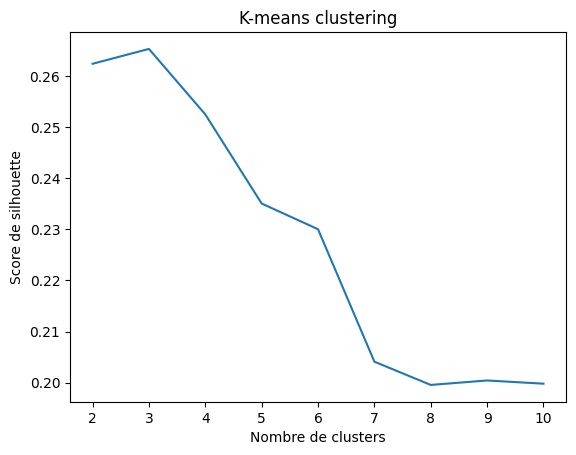

In [ ]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

##### clustering hiérarchique:


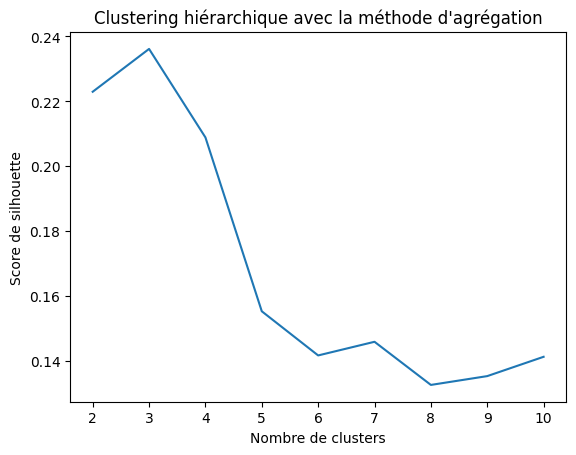

In [ ]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

###### DBSCAN:


In [ ]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_selected)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X_selected, dbscan.labels_))
        else:
            dbscan_scores.append(-1)


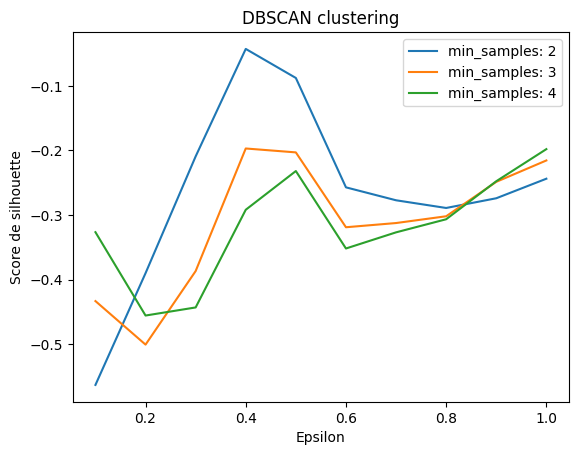

In [ ]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

##### 2 With feature selection 2:

In [ ]:
from sklearn.metrics import silhouette_score
# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    kmeans_scores.append(silhouette_score(X_pca, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_pca)
    hierarchical_scores.append(silhouette_score(X_pca, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X_pca)
    dbscan_scores.append(silhouette_score(X_pca, dbscan_labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

###### K-means clustering:

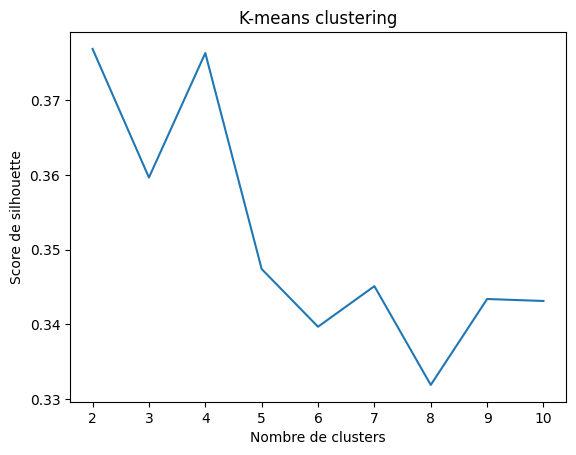

In [ ]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

##### clustering hiérarchique:

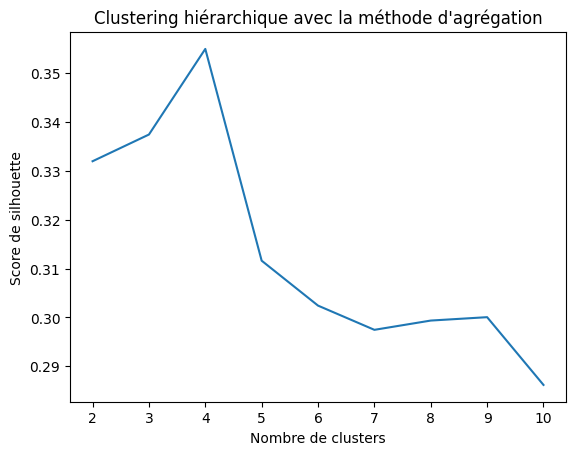

In [ ]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

##### DBSCAN:

In [ ]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_pca)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X_pca, dbscan.labels_))
        else:
            dbscan_scores.append(-1)

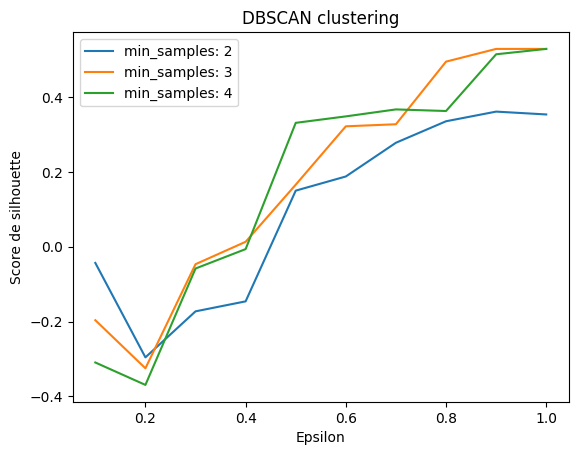

In [ ]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

##### 3 Without feature selection:

In [ ]:
from sklearn.metrics import silhouette_score
# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_all)
    kmeans_scores.append(silhouette_score(X_all, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_all)
    hierarchical_scores.append(silhouette_score(X_all, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X_all)
    dbscan_scores.append(silhouette_score(X_all, dbscan_labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

###### K-means clustering:

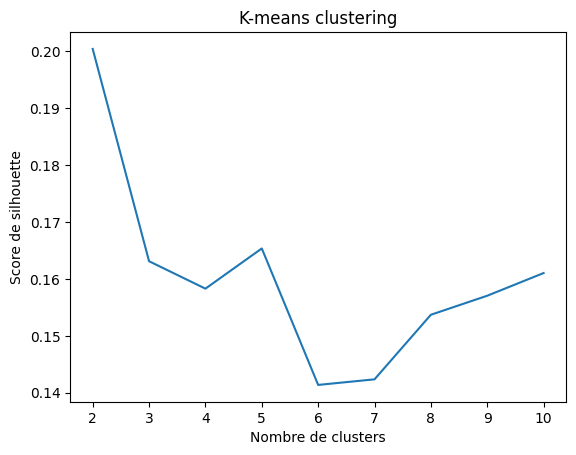

In [ ]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

##### clustering hiérarchique:

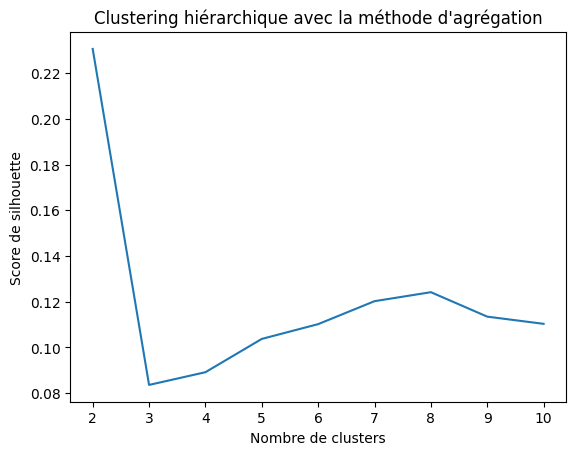

In [ ]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

##### DBSCAN:

In [ ]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_all)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X_all, dbscan.labels_))
        else:
            dbscan_scores.append(-1)

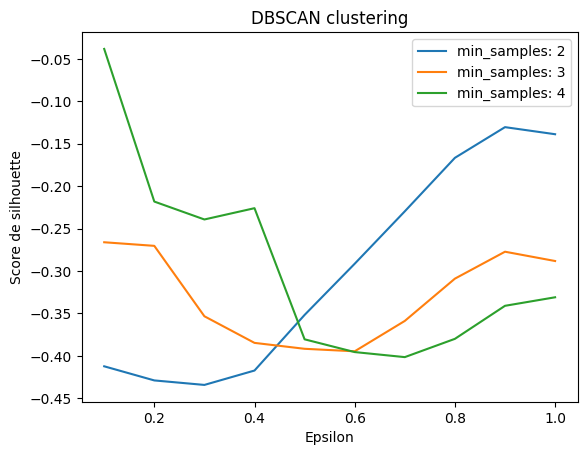

In [ ]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

### II. 2 .2. Evaluation :

##### 1.Mesures des performances:

###### 1 with feature selection 1:

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_selected)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_selected)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###### Rand Index (RI):

Le Rand Index (RI) est une mesure de la similarité entre deux ensembles de labels. Une valeur de RI de 1 indique une correspondance parfaite entre les deux ensembles de labels, tandis qu'une valeur de 0 indique une absence de correspondance.

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
#Kmeans clustring

RI_KNN = adjusted_rand_score(Y, kmeans_labels)
print("Rand Index (RI) ----------> :", RI_KNN)

Rand Index (RI) ----------> : 0.17591083253514217


 la correspondance n'est pas très forte.


In [ ]:
#clustering hiérarchique:

RI_aglomorative = adjusted_rand_score(Y, hierarchical_labels)
print("Rand Index (RI) ----------> :", RI_aglomorative)

Rand Index (RI) ----------> : 0.25066848773337397


la correspondance n'est pas très forte.

In [ ]:
#DBSCAN

RI_DBSCAN = adjusted_rand_score(Y, dbscan_labels)
print("Rand Index (RI) ----------> :", RI_DBSCAN)

Rand Index (RI) ----------> : 0.018038930334828295


la correspondance est très faible.

###### adjusted_mutual_info (MI):

L'information mutuelle (MI) est une mesure de la quantité d'information partagée par deux variables aléatoires.

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

In [ ]:
#Kmeans clustring
MI_KNN = adjusted_mutual_info_score(Y, kmeans_labels)
print("Mutual Information (MI) :", MI_KNN)

Mutual Information (MI) : 0.24793637774124122


'il y a une quantité modérée d'information commune

In [ ]:
#clustering hiérarchique:
MI_aglomorative = adjusted_mutual_info_score(Y, hierarchical_labels)
print("Mutual Information (MI) :", MI_aglomorative)

Mutual Information (MI) : 0.23108497979157813


'il y a une quantité modérée d'information commune

In [ ]:
#DBSCAN
MI_DBSCAN = adjusted_mutual_info_score(Y, dbscan_labels)
print("Mutual Information (MI) :", MI_DBSCAN)

Mutual Information (MI) : 0.11773480606703694


'il y a une quantité modérée d'information commune

###### Indice de Davies-Bouldin:

L'indice de Davies-Bouldin (IDB) est une mesure de la qualité de la séparation entre les clusters dans une solution de clustering. Plus précisément, il mesure la similarité intra-cluster et la dissimilarité inter-cluster.

Plus l'IDB est faible, mieux c'est

In [ ]:
from sklearn.metrics import davies_bouldin_score


In [ ]:
#Kmeans clustring
IDB_KNN = davies_bouldin_score(X_selected, kmeans.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_KNN)

Indice de Davies-Bouldin (IDB) : 1.3321225995445911


la qualité des clusters est assez bonne

In [ ]:
#clustering hiérarchique:
IDB_aglomorative = davies_bouldin_score(X_selected, hierarchical.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_aglomorative)

Indice de Davies-Bouldin (IDB) : 1.4185972758206342


la qualité des clusters est assez bonne

In [ ]:
#DBSCAN
IDB_DBSCAN = davies_bouldin_score(X_selected, dbscan.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_DBSCAN)

Indice de Davies-Bouldin (IDB) : 1.5042993671442535


la qualité des clusters est assez bonne

###### Indice de Calinski-Harabasz:

L'indice de Calinski-Harabasz est une mesure de la qualité d'une solution de clustering. Plus précisément, il mesure la variance entre les clusters et la variance intra-cluster.
 Plus l'indice de Calinski-Harabasz est élevé, mieux c'est

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
#Kmeans clustring
chi_KNN = calinski_harabasz_score(X_selected, kmeans.labels_)
print("Indice de Calinski-Harabasz :", chi_KNN)

Indice de Calinski-Harabasz : 732.2476042503399


la qualité des clusters est assez bonne

In [ ]:
#clustering hiérarchique:
chi_aglomorative = calinski_harabasz_score(X_selected, hierarchical.labels_)
print("Indice de Calinski-Harabasz :", chi_aglomorative)

Indice de Calinski-Harabasz : 627.9435500902218


la qualité des clusters est assez bonne

In [ ]:
#DBSCAN
chi_DBSCAN = calinski_harabasz_score(X_selected, dbscan.labels_)
print("Indice de Calinski-Harabasz :", chi_DBSCAN)

Indice de Calinski-Harabasz : 14.446780980242481


la qualité des clusters est relativement faible,

###### 2 with feature selection 2:

In [ ]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans.fit_predict(X_pca)

hierarchical_pca = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_pca = hierarchical.fit_predict(X_pca)

dbscan_pca = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels_pca = dbscan.fit_predict(X_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###### Rand Index (RI):

In [ ]:
#Kmeans clustring

RI_KNN = adjusted_rand_score(Y, kmeans_labels_pca)
print("Rand Index (RI) ----------> :", RI_KNN)

Rand Index (RI) ----------> : 0.18264537864605787


la correspondance est faible.

In [ ]:
#clustering hiérarchique:

RI_aglomorative = adjusted_rand_score(Y, hierarchical_labels_pca)
print("Rand Index (RI) ----------> :", RI_aglomorative)

Rand Index (RI) ----------> : 0.19966141636845536


la correspondance est  faible.

In [ ]:
#DBSCAN

RI_DBSCAN = adjusted_rand_score(Y, dbscan_labels_pca)
print("Rand Index (RI) ----------> :", RI_DBSCAN)

Rand Index (RI) ----------> : 0.0776698934489537


la correspondance est très faible.

###### adjusted_mutual_info (MI):

In [ ]:
#Kmeans clustring
MI_KNN = adjusted_mutual_info_score(Y, kmeans_labels_pca)
print("Mutual Information (MI) :", MI_KNN)

Mutual Information (MI) : 0.22791980030384085


une association modérée entre les étiquettes

In [ ]:
#clustering hiérarchique:
MI_aglomorative = adjusted_mutual_info_score(Y, hierarchical_labels_pca)
print("Mutual Information (MI) :", MI_aglomorative)

Mutual Information (MI) : 0.19630401936930497


une association modérée entre les étiquettes

In [ ]:
#DBSCAN
MI_DBSCAN = adjusted_mutual_info_score(Y, dbscan_labels_pca)
print("Mutual Information (MI) :", MI_DBSCAN)

Mutual Information (MI) : 0.0819234870335911


 une faible association entre les étiquettes de cluster prédites et les étiquettes de classe réelles,

###### Indice de Davies-Bouldin:

In [ ]:
#Kmeans clustring
IDB_KNN = davies_bouldin_score(X_pca, kmeans_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_KNN)

Indice de Davies-Bouldin (IDB) : 0.9313895674156522


 la qualité des clusters est très bonne,

In [ ]:
#clustering hiérarchique:
IDB_aglomorative = davies_bouldin_score(X_pca, hierarchical_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_aglomorative)

Indice de Davies-Bouldin (IDB) : 0.8554668636366153


 la qualité des clusters est très bonne,

In [ ]:
#DBSCAN
IDB_DBSCAN = davies_bouldin_score(X_pca, dbscan_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_DBSCAN)

Indice de Davies-Bouldin (IDB) : 1.0612137929387495


 la qualité des clusters est assez bonne

###### Indice de Calinski-Harabasz:

In [ ]:
#Kmeans clustring
chi_KNN = calinski_harabasz_score(X_pca, kmeans_labels_pca)
print("Indice de Calinski-Harabasz :", chi_KNN)

Indice de Calinski-Harabasz : 1552.8252027765539


la qualité des clusters est très bonne

In [ ]:
#clustering hiérarchique:
chi_aglomorative = calinski_harabasz_score(X_pca, hierarchical_labels_pca)
print("Indice de Calinski-Harabasz :", chi_aglomorative)

Indice de Calinski-Harabasz : 1142.8732020273353


la qualité des clusters est très bonne

In [ ]:
#DBSCAN
chi_DBSCAN = calinski_harabasz_score(X_pca, dbscan_labels_pca)
print("Indice de Calinski-Harabasz :", chi_DBSCAN)

Indice de Calinski-Harabasz : 62.56003006668413


Indice de Calinski-Harabasz : 62.56003006668413

###### 3 without feature selection:

In [ ]:
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_labels_all = kmeans.fit_predict(X_all)

hierarchical_all = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_all = hierarchical.fit_predict(X_all)

dbscan_all = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels_all = dbscan.fit_predict(X_all)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###### Rand Index (RI):

In [ ]:
#Kmeans clustring

RI_KNN_without = adjusted_rand_score(Y, kmeans_labels_all)
print("Rand Index (RI) ----------> :", RI_KNN_without)

Rand Index (RI) ----------> : 0.19963943749214955


faible association

In [ ]:
#clustering hiérarchique:

RI_aglomorative_without = adjusted_rand_score(Y, hierarchical_labels_all)
print("Rand Index (RI) ----------> :", RI_aglomorative_without)

Rand Index (RI) ----------> : 0.14696382074231676


faible association

###### adjusted_mutual_info (MI):

In [ ]:
#Kmeans clustring
MI_KNN_without = adjusted_mutual_info_score(Y, kmeans_labels_all)
print("Mutual Information (MI) :", MI_KNN_without)

Mutual Information (MI) : 0.20262608315036798


 une association modérée

In [ ]:
#clustering hiérarchique:
MI_aglomorative_without = adjusted_mutual_info_score(Y, hierarchical_labels_all)
print("Mutual Information (MI) :", MI_aglomorative_without)

Mutual Information (MI) : 0.1410360829933353


 une association modérée

In [ ]:
#DBSCAN
MI_DBSCAN_without = adjusted_mutual_info_score(Y, dbscan_labels_all)
print("Mutual Information (MI) :", MI_DBSCAN_without)

Mutual Information (MI) : 0.02025432355455178


une faible association entre les étiquettes

###### Indice de Davies-Bouldin:

In [ ]:
#Kmeans clustring
IDB_KNN_without = davies_bouldin_score(X_all, kmeans_labels_all)
print("Indice de Davies-Bouldin (IDB) :", IDB_KNN_without)

Indice de Davies-Bouldin (IDB) : 1.8986115103288936


 relativement bonne

In [ ]:
#clustering hiérarchique:
IDB_aglomorative_without = davies_bouldin_score(X_all, hierarchical_labels_all)
print("Indice de Davies-Bouldin (IDB) :", IDB_aglomorative_without)

Indice de Davies-Bouldin (IDB) : 2.2291817496246726


la qualité des clusters est relativement faible, car la valeur est élevée, ce qui suggère une faible séparation entre les clusters.

In [ ]:
#DBSCAN
IDB_DBSCAN_without = davies_bouldin_score(X_all, dbscan_labels_all)
print("Indice de Davies-Bouldin (IDB) :", IDB_DBSCAN_without)

Indice de Davies-Bouldin (IDB) : 1.259551229302896


la qualité des clusters est assez bonne,

###### Indice de Calinski-Harabasz:

In [ ]:
#Kmeans clustring
chi_KNN_without = calinski_harabasz_score(X_all, kmeans_labels_all)
print("Indice de Calinski-Harabasz :", chi_KNN_without)

Indice de Calinski-Harabasz : 401.7043041871231


relativement bonne

In [ ]:
#clustering hiérarchique:
chi_aglomorative_without = calinski_harabasz_score(X_all, hierarchical_labels_all)
print("Indice de Calinski-Harabasz :", chi_aglomorative_without)

Indice de Calinski-Harabasz : 315.4226283762414


relativement bonne

In [ ]:
#DBSCAN
chi_DBSCAN_without = calinski_harabasz_score(X_all, dbscan_labels_all)
print("Indice de Calinski-Harabasz :", chi_DBSCAN_without)

Indice de Calinski-Harabasz : 4.071742086650216


 relativement faible

##### 2.Visualisation des clusters générées par les algorithmes de regroupement k-means, hiérarchique et DBSCAN.

###### 1 With feature selection 1:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


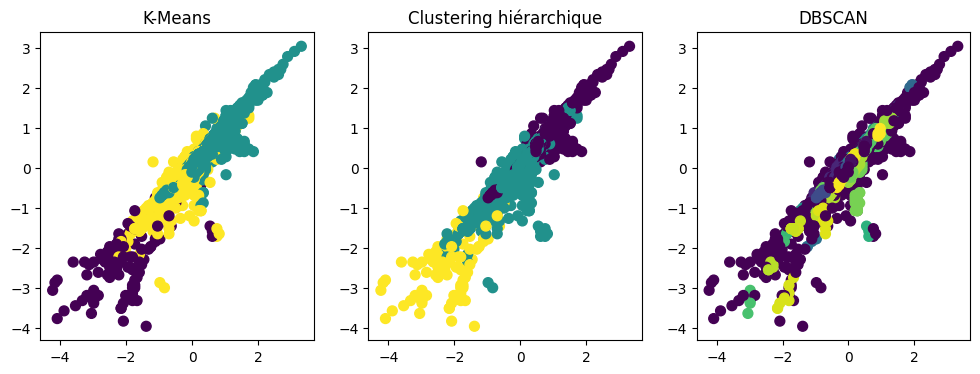

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_selected)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_selected)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X_selected[:, 0], X_selected[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X_selected[:, 0], X_selected[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X_selected[:, 0], X_selected[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

Dans ces 1er et 2eme cas, bien que le score de RI soit faible, le score de MI est légèrement meilleur et les scores de IDB et de Calinski-Harabasz sont moyens à élevés, ce qui suggère une qualité de clustering raisonnable.

###### 2 With feature selection 2:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


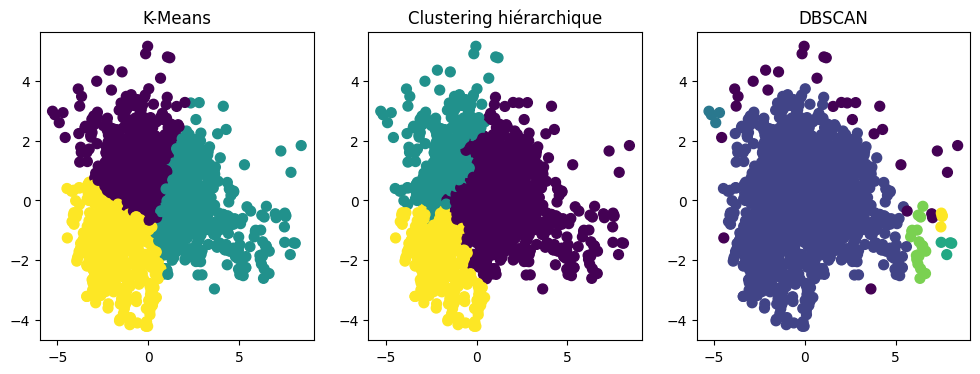

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_pca)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_pca)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

Dans ce cas, bien que le score de RI soit faible, le score de MI est légèrement meilleur et les scores de IDB et de Calinski-Harabasz sont assez bons à élevés, ce qui suggère une qualité de clustering raisonnable.

###### 3 Without feature selection:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


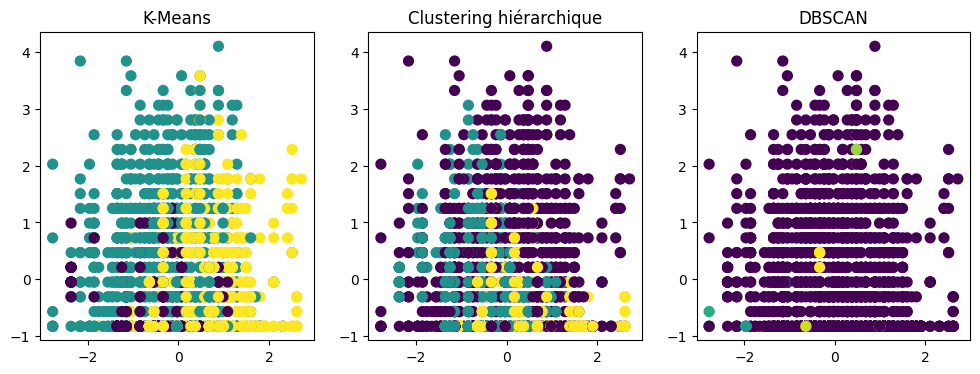

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_all)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_all)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_all)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X_all[:, 0], X_all[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X_all[:, 0], X_all[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X_all[:, 0], X_all[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

### II. 2 .3. Amélioration :
    Après avoir évalué les performances du modèle, on va proposer des améliorations pour améliorer les performances.
    -----------------------------------------------------------------------------------------------------------------------

##### 1 with feature selection 1:

pip install yellowbrick

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

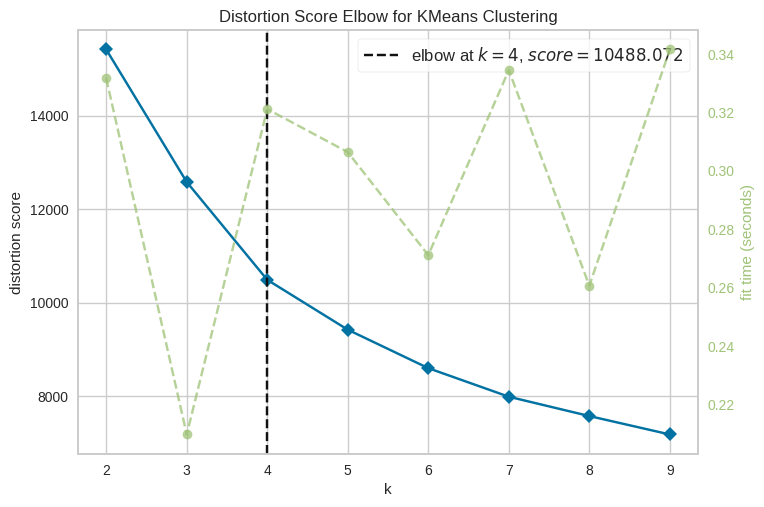

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.25248328152047284

In [ ]:
## Kmeans
from yellowbrick.cluster import KElbowVisualizer

# Créer un objet de modèle
kmeans = KMeans(random_state=42)

# Définir la grille des hyperparamètres à explorer
param_grid = {'n_clusters': range(2, 10)}

# Effectuer la recherche de grille avec validation croisée
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_train_selected, Y_train)

# Trouver le nombre optimal de clusters avec la méthode du coude
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_selected)
visualizer.show()

# Utiliser le nombre optimal de clusters pour entraîner le modèle
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)
silhouette_score(X_selected, kmeans_labels)

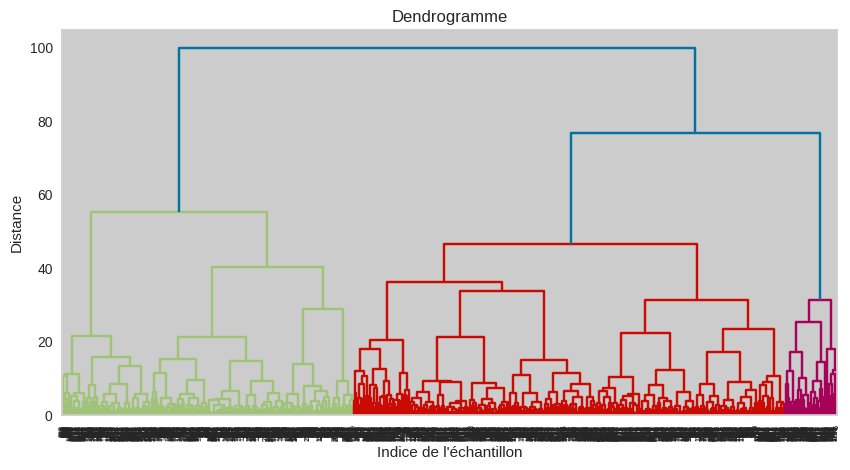

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
##algorithme hiérarchique
# Appliquer l'algorithme hiérarchique avec un nombre de clusters optimal
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_selected)
silhouette_score(X_selected, hierarchical_labels)
# Calculer la matrice de distances
Z = linkage(X_selected, method='ward', optimal_ordering=True)

# Générer le dendrogramme
plt.figure(figsize=(10, 5))
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

DBSCAN with eps= 0.5 has silhouette score: -0.23186818801957515


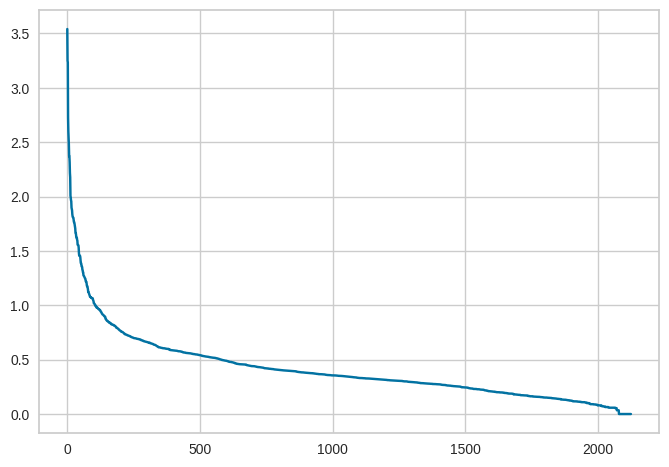

In [ ]:
# DBSCAN
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors object and fit it to the data
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_selected)

# Compute the distances of each point to its nearest neighbor
distances, indices = neighbors_fit.kneighbors(X_selected)

# Sort the distances in descending order and plot them
distances = np.sort(distances[:,1])[::-1]
plt.plot(distances)

# Choose the elbow point as the best epsilon value
eps = 0.5 # change the value to your chosen epsilon
dbscan = DBSCAN(eps=eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_selected)
dbscan_score = silhouette_score(X_selected, dbscan_labels)
print("DBSCAN with eps=", eps, "has silhouette score:", dbscan_score)

##### 2 with feature selection 2:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

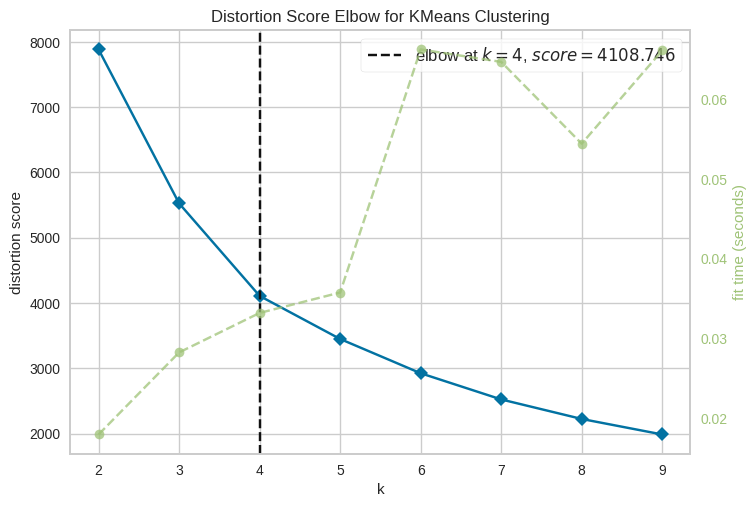

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37632948454473986

In [ ]:
## Kmeans
# Créer un objet de modèle
kmeans = KMeans(random_state=42)

# Définir la grille des hyperparamètres à explorer
param_grid = {'n_clusters': range(2, 10)}

# Effectuer la recherche de grille avec validation croisée
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_train_pca, Y_train)

# Trouver le nombre optimal de clusters avec la méthode du coude
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_pca)
visualizer.show()

# Utiliser le nombre optimal de clusters pour entraîner le modèle
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
silhouette_score(X_pca, kmeans_labels)

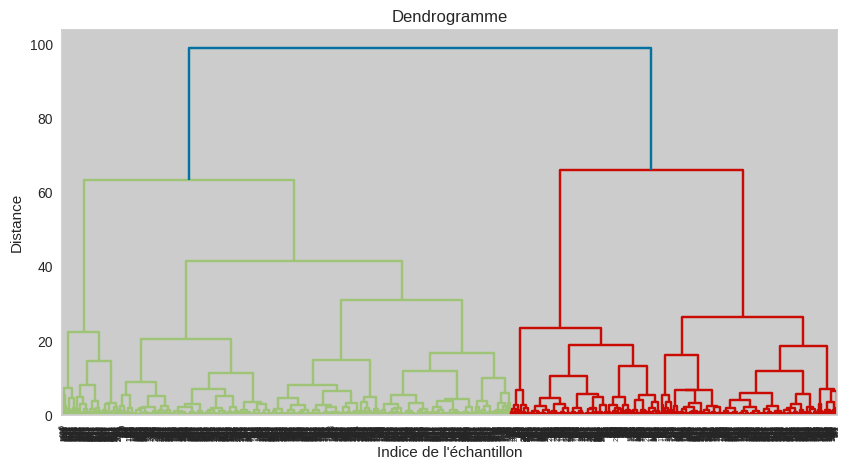

In [ ]:
##algorithme hiérarchique
# Appliquer l'algorithme hiérarchique avec un nombre de clusters optimal
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_pca)
silhouette_score(X_pca, hierarchical_labels)
# Calculer la matrice de distances
Z = linkage(X_pca, method='ward', optimal_ordering=True)

# Générer le dendrogramme
plt.figure(figsize=(10, 5))
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

DBSCAN with eps= 0.5 has silhouette score: 0.33127270921558033


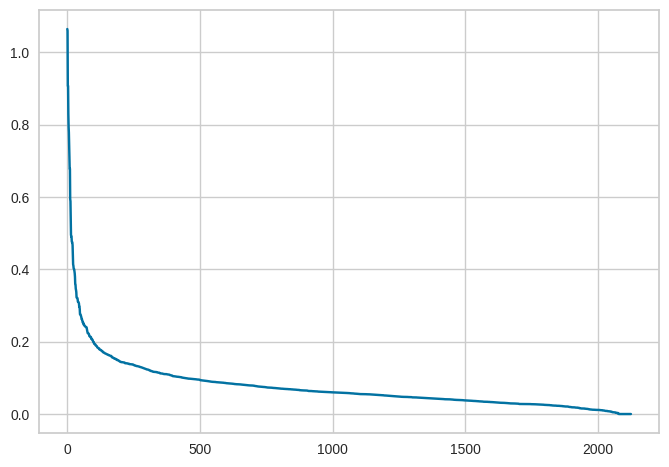

In [ ]:
# DBSCAN
# Create a NearestNeighbors object and fit it to the data
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_pca)

# Compute the distances of each point to its nearest neighbor
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort the distances in descending order and plot them
distances = np.sort(distances[:,1])[::-1]
plt.plot(distances)

# Choose the elbow point as the best epsilon value
eps = 0.5 # change the value to your chosen epsilon
dbscan = DBSCAN(eps=eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_pca)
dbscan_score = silhouette_score(X_pca, dbscan_labels)
print("DBSCAN with eps=", eps, "has silhouette score:", dbscan_score)

##### 3 without feature selection:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

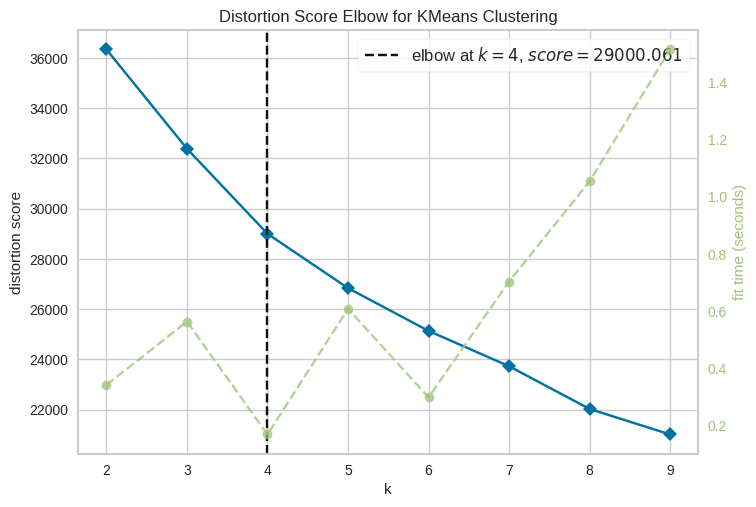

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1582747942800975

In [ ]:
# Créer un objet de modèle
kmeans = KMeans(random_state=42)

# Définir la grille des hyperparamètres à explorer
param_grid = {'n_clusters': range(2, 10)}

# Effectuer la recherche de grille avec validation croisée
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_all_train, Y_all_train)

# Trouver le nombre optimal de clusters avec la méthode du coude
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_all)
visualizer.show()

# Utiliser le nombre optimal de clusters pour entraîner le modèle
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_all)
silhouette_score(X_all, kmeans_labels)


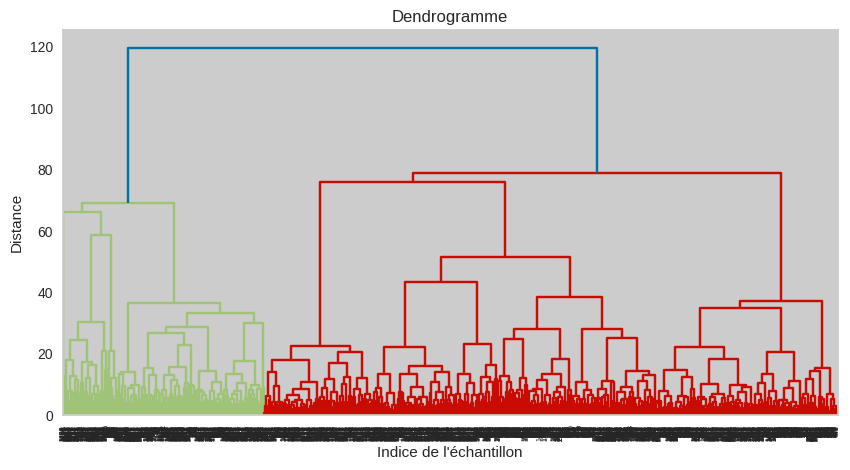

In [ ]:
# Appliquer l'algorithme hiérarchique avec un nombre de clusters optimal
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_all)
silhouette_score(X_all, hierarchical_labels)
# Calculer la matrice de distances
Z = linkage(X_all, method='ward', optimal_ordering=True)

# Générer le dendrogramme
plt.figure(figsize=(10, 5))
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


DBSCAN with eps= 0.5 has silhouette score: -0.3804314478749542


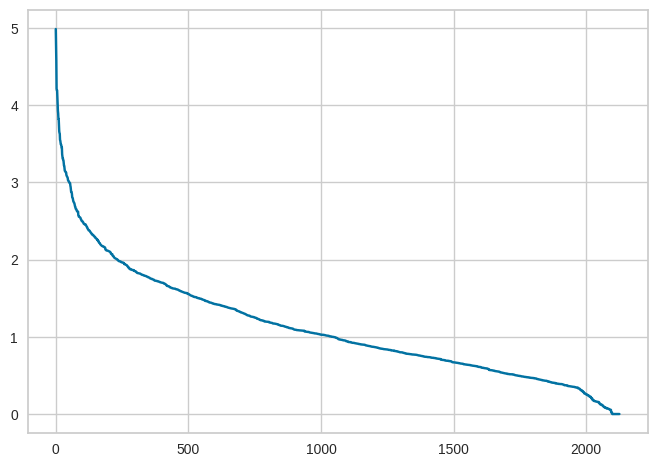

In [ ]:
# Create a NearestNeighbors object and fit it to the data
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_all)

# Compute the distances of each point to its nearest neighbor
distances, indices = neighbors_fit.kneighbors(X_all)

# Sort the distances in descending order and plot them
distances = np.sort(distances[:,1])[::-1]
plt.plot(distances)

# Choose the elbow point as the best epsilon value
eps = 0.5 # change the value to your chosen epsilon
dbscan = DBSCAN(eps=eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_all)
dbscan_score = silhouette_score(X_all, dbscan_labels)
print("DBSCAN with eps=", eps, "has silhouette score:", dbscan_score)


### II. 2 .4. Interpretations :

## VI.Deploiment  :
    Après avoir choisit nos modèles, on va deploiyer les résultats dans une interface utilisateur dans laquelle l'utilisateur peut sélectionner le modèle à utiliser et entrer les données par Streamlit.
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
import pickle

# Enregistrer le modèle KNN
with open('KNN.pkl', 'wb') as file:
    pickle.dump(model_1_with, file)

# Enregistrer le modèle Arbre de décision
with open('Arbre de décision.pkl', 'wb') as file:
    pickle.dump(model_2_with, file)

# Enregistrer le modèle Régression logistique
with open('Régression logistique.pkl', 'wb') as file:
    pickle.dump(model_3_with, file)

# Enregistrer le modèle Forêt aléatoire
with open('Forêt aléatoire.pkl', 'wb') as file:
    pickle.dump(model_4_with, file)

# Enregistrer le modèle SVM
with open('SVM.pkl', 'wb') as file:
    pickle.dump(model_5_with, file)

# Enregistrer le modèle Naive Bayes
with open('Naive Bayes.pkl', 'wb') as file:
    pickle.dump(model_6_with, file)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.4, min_samples=4)
# Enregistrer le modèle Kmeans
with open('Kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Enregistrer le modèle SVM
with open('Agglomorative.pkl', 'wb') as file:
    pickle.dump(hierarchical, file)

# Enregistrer le modèle Naive Bayes
with open('DBSCAN.pkl', 'wb') as file:
    pickle.dump(dbscan, file)

saisir dans le terminal de fichier application.py cette commande:
 streamlit run application.py